In [1]:
# test alt correlation

In [1]:
library(XICOR)

In [13]:
library(tidyverse)
library(data.table)
library(reshape2)
library(ggplot2)
library(RColorBrewer)
library(vegan)
library(dplyr) 
library(ggpubr)
library(Hmisc)
library(corrplot)
library(ggpmisc)
library(scales)
library(broom)
library(grid)
library(png)
library(forcats)
library(gridExtra)
library(tibble)
library(rstatix)

In [14]:
setwd("/home/strawberry/Documents/Collaborations/sinusite_edwin/data")
ReadCounts_TaxAnnotation <- read.delim("./ReadCounts_TaxAnnotation_SILVA.tsv")
metadata_filtered <- read.delim("./metadata_filtered_Diversity.tsv")
staph_species_plot <- read.delim("./staph_species_plot.tsv")

head(ReadCounts_TaxAnnotation)
head(metadata_filtered)
head(staph_species_plot)

,ID_Sample,id,count,Kingdom,Phylum,Class,Order,Family,Genus,Species,⋯,Sex,Age,Atopic_Symptoms,Asthma,NSAID_Intolerance,Total_IgE,Blood_Eosinophilia,Tissue_Eosinophilia,Final_LundMackay,AlignmentEfficiency
,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<int>,<dbl>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<dbl>
1,0001967K_T1,AB646616,1,Bacteria,Bacillota,Bacilli,Staphylococcales,Staphylococcaceae,Staphylococcus,Staphylococcus saccharolyticus,⋯,1,58.7,1,1,0,38,100,10,15,99.85097
2,0001967K_T1,AF015929,4,Bacteria,Bacillota,Bacilli,Staphylococcales,Staphylococcaceae,Staphylococcus,Staphylococcus aureus,⋯,1,58.7,1,1,0,38,100,10,15,99.85097
3,0001967K_T1,AGEF01000005,1,Bacteria,Bacillota,Bacilli,Lactobacillales,Carnobacteriaceae,Dolosigranulum,Dolosigranulum pigrum ATCC 51524,⋯,1,58.7,1,1,0,38,100,10,15,99.85097
4,0001967K_T1,AIYD01000002,2,Bacteria,Bacillota,Bacilli,Staphylococcales,Staphylococcaceae,Staphylococcus,Staphylococcus aureus M1016,⋯,1,58.7,1,1,0,38,100,10,15,99.85097
5,0001967K_T1,AJ439343,1,Bacteria,Actinomycetota,Actinobacteria,Mycobacteriales,Corynebacteriaceae,Corynebacterium,Corynebacterium pseudodiphtheriticum,⋯,1,58.7,1,1,0,38,100,10,15,99.85097
6,0001967K_T1,AJ938182,1,Bacteria,Bacillota,Bacilli,Staphylococcales,Staphylococcaceae,Staphylococcus,Staphylococcus aureus RF122,⋯,1,58.7,1,1,0,38,100,10,15,99.85097


,ID_Sample,SNOT22,SNOT22nasal,LK_Total,LK_Secret,ClinicCtrl,AntUse,Cortuse,Patient,Filename,⋯,Timepoint,Sex,Age,Atopic_Symptoms,Asthma,NSAID_Intolerance,Total_IgE,Blood_Eosinophilia,Tissue_Eosinophilia,Final_LundMackay
,<chr>,<int>,<int>,<int>,<int>,<chr>,<int>,<int>,<chr>,<chr>,⋯,<chr>,<int>,<dbl>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>
1,0001967K_T1,38,12,4,2,NC,1,1,0001967K,0001967K_T1.fastq,⋯,T1,1,58.7,1,1,0,38,100,10,15
2,0001967K_T3,96,26,10,4,NC,1,0,0001967K,0001967K_T3.fastq,⋯,T3,1,58.7,1,1,0,38,100,10,15
3,0001967K_T6,79,19,6,4,NC,1,1,0001967K,0001967K_T6.fastq,⋯,T6,1,58.7,1,1,0,38,100,10,15
4,0088303G_T0,102,37,8,2,NC,NA,0,0088303G,0088303G_T0.fastq,⋯,T0,2,60.3,1,1,0,667,800,58,22
5,0088303G_T1,32,7,4,1,NC,1,0,0088303G,0088303G_T1.fastq,⋯,T1,2,60.3,1,1,0,667,800,58,22
6,0088303G_T3,NA,NA,NA,NA,NA,0,0,0088303G,0088303G_T3.fastq,⋯,T3,2,60.3,1,1,0,667,800,58,22


,ID_Sample,Timepoint,Taxa_clean,RelativeAbundance
,<chr>,<chr>,<chr>,<dbl>
1,0001967K_T1,T1,Staphylococcus argenteus,0.59594756
2,0001967K_T1,T1,Staphylococcus aureus,95.70917759
3,0001967K_T1,T1,Staphylococcus epidermidis,0.20858164
4,0001967K_T1,T1,Staphylococcus saccharolyticus,0.02979738
5,0001967K_T1,T1,Staphylococcus sp.,0.08939213
6,0001967K_T3,T3,Staphylococcus argenteus,0.61418811


In [15]:
# Correlation 1: CoPS x CoNS 
## Define your groups
CoPS <- c(
  "Staphylococcus aureus",
  "Staphylococcus argenteus",
  "Staphylococcus intermedius",
  "Staphylococcus pseudintermedius",
  "Staphylococcus delphini",
  "Staphylococcus schleiferi",
  "Staphylococcus lutrae"
)

CoNS <- c(
  "Staphylococcus epidermidis",
  "Staphylococcus saccharolyticus",
  "Staphylococcus sp.",
  "Staphylococcus auricularis",
  "Staphylococcus capitis",
  "Staphylococcus cohnii",
  "Staphylococcus gallinarum",
  "Staphylococcus haemolyticus",
  "Staphylococcus hominis",
  "Staphylococcus lugdunensis",  
  "Staphylococcus nepalensis",
  "Staphylococcus pasteuri",
  "Staphylococcus petrasii",
  "Staphylococcus saprophyticus",
  "Staphylococcus simiae",
  "Staphylococcus warneri",
  "Staphylococcus xylosus",
  "Staphylococcus caprae",
  "Staphylococcus chromogenes",
  "Staphylococcus devriesei",
  "Staphylococcus pettenkoferi",
  "Staphylococcus piscifermentans",
  "Staphylococcus sciuri",
  "Staphylococcus succinus",
  "Staphylococcus agnetis",
  "Staphylococcus simulans",
  "Staphylococcus massiliensis",
  "Staphylococcus muscae",
  "Staphylococcus lentus",
  "Staphylococcus arlettae",
  "Staphylococcus stepanovicii",
  "Staphylococcus carnosus"
)

# Add group labels to the dataframe
staph_species_labeled <- staph_species_plot %>%
  mutate(group = case_when(
    Taxa_clean %in% CoPS ~ "CoPS",
    Taxa_clean %in% CoNS ~ "CoNS",
    TRUE ~ NA_character_
  )) %>%
  filter(!is.na(group))

# Summarize relative abundances by group per sample
rel_ab_staph_grouped <- staph_species_labeled %>%
  group_by(ID_Sample, group) %>%
  summarise(RelAb = sum(RelativeAbundance), .groups = "drop") %>%
  pivot_wider(names_from = group, values_from = RelAb, values_fill = 0) %>%
  mutate(log2_ratio_CoPS_CoNS = log2((CoPS + 1e-6) / (CoNS + 1e-6)))

# View summary
print(head(rel_ab_staph_grouped))
print(head(staph_species_labeled))

# A tibble: 6 × 4
  ID_Sample     CoNS  CoPS log2_ratio_CoPS_CoNS
  <chr>        <dbl> <dbl>                <dbl>
1 0001967K_T1  0.328 96.3                 8.20 
2 0001967K_T3  0.616 97.8                 7.31 
3 0001967K_T6  0.229 98.6                 8.75 
4 0088303G_T0 61.0    1.81               -5.08 
5 0088303G_T1  1.31  97.2                 6.21 
6 0088303G_T3 45.3   33.9                -0.418
    ID_Sample Timepoint                     Taxa_clean RelativeAbundance group
1 0001967K_T1        T1       Staphylococcus argenteus        0.59594756  CoPS
2 0001967K_T1        T1          Staphylococcus aureus       95.70917759  CoPS
3 0001967K_T1        T1     Staphylococcus epidermidis        0.20858164  CoNS
4 0001967K_T1        T1 Staphylococcus saccharolyticus        0.02979738  CoNS
5 0001967K_T1        T1             Staphylococcus sp.        0.08939213  CoNS
6 0001967K_T3        T3       Staphylococcus argenteus        0.61418811  CoPS


In [16]:
merged_staph_meta <- metadata_filtered %>%
  left_join(rel_ab_staph_grouped, by = "ID_Sample")
print(head(merged_staph_meta))

    ID_Sample SNOT22 SNOT22nasal LK_Total LK_Secret ClinicCtrl AntUse Cortuse
1 0001967K_T1     38          12        4         2         NC      1       1
2 0001967K_T3     96          26       10         4         NC      1       0
3 0001967K_T6     79          19        6         4         NC      1       1
4 0088303G_T0    102          37        8         2         NC     NA       0
5 0088303G_T1     32           7        4         1         NC      1       0
6 0088303G_T3     NA          NA       NA        NA       <NA>      0       0
   Patient          Filename nreads Timepoint Sex  Age Atopic_Symptoms Asthma
1 0001967K 0001967K_T1.fastq   1061        T1   1 58.7               1      1
2 0001967K 0001967K_T3.fastq  20860        T3   1 58.7               1      1
3 0001967K 0001967K_T6.fastq  48290        T6   1 58.7               1      1
4 0088303G 0088303G_T0.fastq   9051        T0   2 60.3               1      1
5 0088303G 0088303G_T1.fastq  11707        T1   2 60.3          

In [17]:
# df <- na.omit(merged_staph_meta[, c("log2_ratio_CoPS_CoNS", "SNOT22")])
# head(df)

In [18]:
# Compute xi correlation
xi_result <- xicor(
  x       = merged_staph_meta$log2_ratio_CoPS_CoNS,
  y       = merged_staph_meta$SNOT22,
  pvalue  = TRUE,
  ties    = TRUE,
  method  = "permutation", 
  nperm = 100000
)

# Print results
print(xi_result)

ERROR: Error in xicor(x = merged_staph_meta$log2_ratio_CoPS_CoNS, y = merged_staph_meta$SNOT22, : could not find function "xicor"


In [19]:
# Define the target variable
target_var <- "log2_ratio_CoPS_CoNS"

# Specify variables that should be treated as categorical and excluded
categorical_vars <- c(
  "Sex", "Atopic_Symptoms", "AntUse", 
  "Asthma", "Cortuse", "NSAID_Intolerance"
)

# Select numeric clinical parameters, excluding target and categorical variables
clinical_vars <- merged_staph_meta %>%
  select(where(is.numeric)) %>%
  select(-all_of(c(target_var, categorical_vars))) %>%
  colnames()

# Function to compute xi correlation for one variable
compute_xi <- function(var) {
  df <- na.omit(merged_staph_meta[, c(target_var, var)])
  
  if (nrow(df) < 3) return(NULL) # not enough data
  
  res <- xicor(
    x       = df[[target_var]],
    y       = df[[var]],
    pvalue  = TRUE,
    ties    = TRUE,
    method  = "asymptotic"
  )
  
  data.frame(
    variable = var,
    xi       = res$xi,
    sd       = res$sd,
    pval     = res$pval
  )
}

# Apply to all clinical variables
results <- do.call(rbind, lapply(clinical_vars, compute_xi))

# Sort by p-value
results_sorted <- results %>% arrange(pval)

# Show results
print(results_sorted)

ERROR: Error in xicor(x = df[[target_var]], y = df[[var]], pvalue = TRUE, ties = TRUE, : could not find function "xicor"


In [20]:
print(head(ReadCounts_TaxAnnotation))


    ID_Sample           id count  Kingdom         Phylum          Class
1 0001967K_T1     AB646616     1 Bacteria      Bacillota        Bacilli
2 0001967K_T1     AF015929     4 Bacteria      Bacillota        Bacilli
3 0001967K_T1 AGEF01000005     1 Bacteria      Bacillota        Bacilli
4 0001967K_T1 AIYD01000002     2 Bacteria      Bacillota        Bacilli
5 0001967K_T1     AJ439343     1 Bacteria Actinomycetota Actinobacteria
6 0001967K_T1     AJ938182     1 Bacteria      Bacillota        Bacilli
             Order             Family           Genus
1 Staphylococcales  Staphylococcaceae  Staphylococcus
2 Staphylococcales  Staphylococcaceae  Staphylococcus
3  Lactobacillales  Carnobacteriaceae  Dolosigranulum
4 Staphylococcales  Staphylococcaceae  Staphylococcus
5  Mycobacteriales Corynebacteriaceae Corynebacterium
6 Staphylococcales  Staphylococcaceae  Staphylococcus
                               Species total_aligned RelativeAbundance SNOT22
1       Staphylococcus saccharolyticus  

In [21]:
# Correlate microbe x clinical parameters
## Load abundance per timepoint tables
abund_file <- "Abund_by_Timepoint_4_Corr_T0.tsv"
abund_df <- read.delim(abund_file, check.names = FALSE)

## Convert row names (sample IDs) into a proper column
abund_df <- abund_df %>%
  rownames_to_column(var = "ID_Sample")
head(abund_df)

,ID_Sample,Anaerococcus,Corynebacterium,Cutibacterium,Dolosigranulum,Finegoldia,Haemophilus,Incertae Sedis,Peptoniphilus,Porphyromonas,⋯,Prevotella,Serratia,Achromobacter,Granulicatella,Moraxella,Pantoea,Citrobacter,Parvimonas,Leptotrichia,Mycoplasmoides
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0088303G_T0,0.6011422,5.6807935,0.1502855,14.93838293,0.81154193,0.1803427,1.1722272,0.7213706,0.12022843,⋯,0.00000000,0.00000000,0.0000000,0.000000,0.00000000,0.000000,0.0000000,0,0,0
2,0110059G_T0,11.0485269,0.5199307,5.8925477,6.15251300,5.63258232,2.7296360,0.4766031,21.4904679,0.04332756,⋯,0.00000000,0.00000000,0.0000000,0.000000,0.00000000,0.000000,0.0000000,0,0,0
3,0130765A_T0,10.6796117,0.8252427,1.1650485,0.04854369,5.82524272,1.7961165,1.2621359,10.7766990,0.00000000,⋯,8.25242718,0.04854369,0.0000000,0.000000,0.00000000,0.000000,0.0000000,0,0,0
4,0207720E_T0,0.7651841,0.0000000,0.1912960,0.11956002,0.07173601,0.0000000,0.1195600,0.2869440,0.00000000,⋯,0.07173601,0.02391200,0.0239120,0.023912,0.09564802,0.023912,0.0000000,0,0,0
5,0236549G_T0,0.7183908,25.6465517,0.8620690,2.51436782,0.14367816,0.0000000,0.1436782,0.4310345,0.00000000,⋯,0.00000000,3.01724138,0.2873563,0.000000,0.00000000,0.000000,0.2155172,0,0,0
6,0313863D_T0,0.3693592,1.1883732,0.1927092,91.77774209,0.06423639,0.0160591,0.1124137,0.2408865,0.00000000,⋯,0.00000000,0.00000000,0.0000000,0.000000,0.00000000,0.000000,0.0000000,0,0,0


In [22]:
abund_folder <- getwd()
abund_files <- list.files(abund_folder, pattern = "Abund_by_Timepoint_4_Corr_", full.names = FALSE)
abund_df <- abund_files %>%
  set_names() %>%  # optional: keep file names for reference
  map_dfr(~ read.delim(.x, check.names = FALSE) %>%
            rownames_to_column(var = "ID_Sample"), .id = "source_file")

# Check
print(head(abund_df))


                       source_file   ID_Sample Anaerococcus Corynebacterium
1 Abund_by_Timepoint_4_Corr_T0.tsv 0088303G_T0    0.6011422       5.6807935
2 Abund_by_Timepoint_4_Corr_T0.tsv 0110059G_T0   11.0485269       0.5199307
3 Abund_by_Timepoint_4_Corr_T0.tsv 0130765A_T0   10.6796117       0.8252427
4 Abund_by_Timepoint_4_Corr_T0.tsv 0207720E_T0    0.7651841       0.0000000
5 Abund_by_Timepoint_4_Corr_T0.tsv 0236549G_T0    0.7183908      25.6465517
6 Abund_by_Timepoint_4_Corr_T0.tsv 0313863D_T0    0.3693592       1.1883732
  Cutibacterium Dolosigranulum Finegoldia Haemophilus Incertae Sedis
1     0.1502855    14.93838293 0.81154193   0.1803427      1.1722272
2     5.8925477     6.15251300 5.63258232   2.7296360      0.4766031
3     1.1650485     0.04854369 5.82524272   1.7961165      1.2621359
4     0.1912960     0.11956002 0.07173601   0.0000000      0.1195600
5     0.8620690     2.51436782 0.14367816   0.0000000      0.1436782
6     0.1927092    91.77774209 0.06423639   0.0160591 

In [23]:
merged_df <- abund_df %>%
  left_join(metadata_filtered %>% select(ID_Sample, SNOT22), by = "ID_Sample")
print(head(merged_df))

                       source_file   ID_Sample Anaerococcus Corynebacterium
1 Abund_by_Timepoint_4_Corr_T0.tsv 0088303G_T0    0.6011422       5.6807935
2 Abund_by_Timepoint_4_Corr_T0.tsv 0110059G_T0   11.0485269       0.5199307
3 Abund_by_Timepoint_4_Corr_T0.tsv 0130765A_T0   10.6796117       0.8252427
4 Abund_by_Timepoint_4_Corr_T0.tsv 0207720E_T0    0.7651841       0.0000000
5 Abund_by_Timepoint_4_Corr_T0.tsv 0236549G_T0    0.7183908      25.6465517
6 Abund_by_Timepoint_4_Corr_T0.tsv 0313863D_T0    0.3693592       1.1883732
  Cutibacterium Dolosigranulum Finegoldia Haemophilus Incertae Sedis
1     0.1502855    14.93838293 0.81154193   0.1803427      1.1722272
2     5.8925477     6.15251300 5.63258232   2.7296360      0.4766031
3     1.1650485     0.04854369 5.82524272   1.7961165      1.2621359
4     0.1912960     0.11956002 0.07173601   0.0000000      0.1195600
5     0.8620690     2.51436782 0.14367816   0.0000000      0.1436782
6     0.1927092    91.77774209 0.06423639   0.0160591 

In [23]:
ggsave("plot_by_patient_sig.png", plot = plot_by_patient_sig, width = 10, height = 10, dpi = 150)

`geom_smooth()` using formula = 'y ~ x'


In [25]:
colnames(ReadCounts_TaxAnnotation)

[1] "ID_Sample"           "id"                  "count"              
 [4] "Kingdom"             "Phylum"              "Class"              
 [7] "Order"               "Family"              "Genus"              
[10] "Species"             "total_aligned"       "RelativeAbundance"  
[13] "SNOT22"              "SNOT22nasal"         "LK_Total"           
[16] "LK_Secret"           "ClinicCtrl"          "AntUse"             
[19] "Cortuse"             "Patient"             "Filename"           
[22] "nreads"              "Timepoint"           "Sex"                
[25] "Age"                 "Atopic_Symptoms"     "Asthma"             
[28] "NSAID_Intolerance"   "Total_IgE"           "Blood_Eosinophilia" 
[31] "Tissue_Eosinophilia" "Final_LundMackay"    "AlignmentEfficiency"

In [26]:
cor.test(ReadCounts_TaxAnnotation$RelativeAbundance, ReadCounts_TaxAnnotation$Final_LundMackay, method = "spearman")

Warning message in cor.test.default(ReadCounts_TaxAnnotation$RelativeAbundance, :
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  ReadCounts_TaxAnnotation$RelativeAbundance and ReadCounts_TaxAnnotation$Final_LundMackay
S = 5.9469e+14, p-value = 0.0002067
alternative hypothesis: true rho is not equal to 0
sample estimates:
         rho 
-0.009507348 


In [27]:
cor.test(ReadCounts_TaxAnnotation$RelativeAbundance, ReadCounts_TaxAnnotation$Total_IgE, method = "spearman")

Warning message in cor.test.default(ReadCounts_TaxAnnotation$RelativeAbundance, :
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  ReadCounts_TaxAnnotation$RelativeAbundance and ReadCounts_TaxAnnotation$Total_IgE
S = 4.95e+14, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
        rho 
-0.03292932 


In [9]:
head(metadata_filtered)
head(staph_species_plot)

,ID_Sample,SNOT22,SNOT22nasal,LK_Total,LK_Secret,ClinicCtrl,AntUse,Cortuse,Patient,Filename,⋯,Timepoint,Sex,Age,Atopic_Symptoms,Asthma,NSAID_Intolerance,Total_IgE,Blood_Eosinophilia,Tissue_Eosinophilia,Final_LundMackay
,<chr>,<int>,<int>,<int>,<int>,<chr>,<int>,<int>,<chr>,<chr>,⋯,<chr>,<int>,<dbl>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>
1,0001967K_T1,38,12,4,2,NC,1,1,0001967K,0001967K_T1.fastq,⋯,T1,1,58.7,1,1,0,38,100,10,15
2,0001967K_T3,96,26,10,4,NC,1,0,0001967K,0001967K_T3.fastq,⋯,T3,1,58.7,1,1,0,38,100,10,15
3,0001967K_T6,79,19,6,4,NC,1,1,0001967K,0001967K_T6.fastq,⋯,T6,1,58.7,1,1,0,38,100,10,15
4,0088303G_T0,102,37,8,2,NC,NA,0,0088303G,0088303G_T0.fastq,⋯,T0,2,60.3,1,1,0,667,800,58,22
5,0088303G_T1,32,7,4,1,NC,1,0,0088303G,0088303G_T1.fastq,⋯,T1,2,60.3,1,1,0,667,800,58,22
6,0088303G_T3,NA,NA,NA,NA,NA,0,0,0088303G,0088303G_T3.fastq,⋯,T3,2,60.3,1,1,0,667,800,58,22


,ID_Sample,Timepoint,Taxa_clean,RelativeAbundance
,<chr>,<chr>,<chr>,<dbl>
1,0001967K_T1,T1,Staphylococcus argenteus,0.59594756
2,0001967K_T1,T1,Staphylococcus aureus,95.70917759
3,0001967K_T1,T1,Staphylococcus epidermidis,0.20858164
4,0001967K_T1,T1,Staphylococcus saccharolyticus,0.02979738
5,0001967K_T1,T1,Staphylococcus sp.,0.08939213
6,0001967K_T3,T3,Staphylococcus argenteus,0.61418811


In [63]:
# Select only the categorical/binary columns
binomial_df <- ReadCounts_TaxAnnotation %>%
  select(ID_Sample, Sex, Atopic_Symptoms, Asthma, NSAID_Intolerance, Genus, Species, Patient, Timepoint, RelativeAbundance)

# Check the first rows
head(binomial_df)

,ID_Sample,Sex,Atopic_Symptoms,Asthma,NSAID_Intolerance,Genus,Species,Patient,Timepoint,RelativeAbundance
,<chr>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>
1,0001967K_T1,1,1,1,0,Staphylococcus,Staphylococcus saccharolyticus,0001967K,T1,0.1492537
2,0001967K_T1,1,1,1,0,Staphylococcus,Staphylococcus aureus,0001967K,T1,0.5970149
3,0001967K_T1,1,1,1,0,Dolosigranulum,Dolosigranulum pigrum ATCC 51524,0001967K,T1,0.1492537
4,0001967K_T1,1,1,1,0,Staphylococcus,Staphylococcus aureus M1016,0001967K,T1,0.2985075
5,0001967K_T1,1,1,1,0,Corynebacterium,Corynebacterium pseudodiphtheriticum,0001967K,T1,0.1492537
6,0001967K_T1,1,1,1,0,Staphylococcus,Staphylococcus aureus RF122,0001967K,T1,0.1492537


In [12]:
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("ANCOMBC")

Bioconductor version '3.18' is out-of-date; the current release version '3.21'
  is available with R version '4.5'; see https://bioconductor.org/install

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.18 (BiocManager 1.30.25), R 4.3.3 (2024-02-29)

Installing package(s) 'ANCOMBC'

also installing the dependencies ‘sitmo’, ‘RcppHNSW’, ‘ScaledMatrix’, ‘irlba’, ‘rsvd’, ‘beeswarm’, ‘vipor’, ‘FNN’, ‘RcppAnnoy’, ‘RSpectra’, ‘dqrng’, ‘RcppProgress’, ‘Cairo’, ‘yulab.utils’, ‘BiocBaseUtils’, ‘sparseMatrixStats’, ‘beachmat’, ‘BiocNeighbors’, ‘BiocSingular’, ‘ggbeeswarm’, ‘Rtsne’, ‘RcppML’, ‘uwot’, ‘pheatmap’, ‘ggrastr’, ‘rootSolve’, ‘lmom’, ‘tidytree’, ‘MultiAssayExperiment’, ‘decontam’, ‘DelayedMatrixStats’, ‘scuttle’, ‘scater’, ‘DirichletMultinomial’, ‘bluster’, ‘gmp’, ‘Rmpfr’, ‘ECOSolveR’, ‘scs’, ‘osqp’, ‘expm’, ‘Exact’, ‘gl

In [28]:
library(tidyverse)
library(data.table)
library(reshape2)
library(ggplot2)
library(RColorBrewer)
library(vegan)
library(dplyr) 
library(ggpubr)
library(Hmisc)
library(corrplot)
library(ggpmisc)
library(scales)
library(broom)
library(grid)
library(png)
library(forcats)
library(gridExtra)
library(tibble)
library(devtools)
library(pairwiseAdonis)
library(ggsignif)
library(FSA)

Loading required package: usethis


Attaching package: ‘devtools’


The following object is masked from ‘package:permute’:

    check


Registered S3 methods overwritten by 'FSA':
  method       from
  confint.boot car 
  hist.boot    car 

## FSA v0.9.6. See citation('FSA') if used in publication.
## Run fishR() for related website and fishR('IFAR') for related book.



In [29]:
# ---- Load and merge all abundance tables ----
abund_files <- list.files(
  path = "./",
  pattern = "Abund_by_Timepoint_4_Corr_.*\\.tsv$",
  full.names = TRUE
)

In [30]:
# Read and append source files
abund_df_all <- abund_files %>%
  lapply(function(file_path) {
    df <- read.delim(file_path, check.names = FALSE, row.names = 1) %>%
      rownames_to_column(var = "ID_Sample")
    df
  }) %>%
  bind_rows()
print(head(abund_df_all))

    ID_Sample Anaerococcus Corynebacterium Cutibacterium Dolosigranulum
1 0088303G_T0    0.6011422       5.6807935     0.1502855    14.93838293
2 0110059G_T0   11.0485269       0.5199307     5.8925477     6.15251300
3 0130765A_T0   10.6796117       0.8252427     1.1650485     0.04854369
4 0207720E_T0    0.7651841       0.0000000     0.1912960     0.11956002
5 0236549G_T0    0.7183908      25.6465517     0.8620690     2.51436782
6 0313863D_T0    0.3693592       1.1883732     0.1927092    91.77774209
  Finegoldia Haemophilus Incertae Sedis Peptoniphilus Porphyromonas Pseudomonas
1 0.81154193   0.1803427      1.1722272     0.7213706    0.12022843  0.06011422
2 5.63258232   2.7296360      0.4766031    21.4904679    0.04332756  3.46620451
3 5.82524272   1.7961165      1.2621359    10.7766990    0.00000000 14.70873786
4 0.07173601   0.0000000      0.1195600     0.2869440    0.00000000  0.52606408
5 0.14367816   0.0000000      0.1436782     0.4310345    0.00000000  5.45977011
6 0.06423639   0

In [31]:
colnames(metadata_filtered)

[1] "ID_Sample"           "SNOT22"              "SNOT22nasal"        
 [4] "LK_Total"            "LK_Secret"           "ClinicCtrl"         
 [7] "AntUse"              "Cortuse"             "Patient"            
[10] "Filename"            "nreads"              "Timepoint"          
[13] "Sex"                 "Age"                 "Atopic_Symptoms"    
[16] "Asthma"              "NSAID_Intolerance"   "Total_IgE"          
[19] "Blood_Eosinophilia"  "Tissue_Eosinophilia" "Final_LundMackay"

In [32]:
# ---- Merge with metadata ----
merged_df <- abund_df_all %>%
  left_join(metadata_filtered %>% select(ID_Sample, ClinicCtrl, Cortuse), by = "ID_Sample") %>%
  filter(!is.na(ClinicCtrl))
print(head(merged_df))

    ID_Sample Anaerococcus Corynebacterium Cutibacterium Dolosigranulum
1 0088303G_T0    0.6011422       5.6807935     0.1502855    14.93838293
2 0110059G_T0   11.0485269       0.5199307     5.8925477     6.15251300
3 0130765A_T0   10.6796117       0.8252427     1.1650485     0.04854369
4 0207720E_T0    0.7651841       0.0000000     0.1912960     0.11956002
5 0236549G_T0    0.7183908      25.6465517     0.8620690     2.51436782
6 0313863D_T0    0.3693592       1.1883732     0.1927092    91.77774209
  Finegoldia Haemophilus Incertae Sedis Peptoniphilus Porphyromonas Pseudomonas
1 0.81154193   0.1803427      1.1722272     0.7213706    0.12022843  0.06011422
2 5.63258232   2.7296360      0.4766031    21.4904679    0.04332756  3.46620451
3 5.82524272   1.7961165      1.2621359    10.7766990    0.00000000 14.70873786
4 0.07173601   0.0000000      0.1195600     0.2869440    0.00000000  0.52606408
5 0.14367816   0.0000000      0.1436782     0.4310345    0.00000000  5.45977011
6 0.06423639   0

In [33]:
# ---- Prepare genus abundance matrix ----
rownames(merged_df) <- merged_df$ID_Sample
genus_data <- merged_df %>% select(-ID_Sample, -ClinicCtrl)
# head(genus_data)

In [34]:
# Replace NAs with zeros
# genus_data_noNA <- genus_data %>%
#   mutate_all(~ ifelse(is.na(.), 0, .))

# Remove NAs
genus_data_noNA <- na.omit(genus_data)

# Transpose it to have genera as rows
genus_data_transposed <- as.data.frame(t(genus_data_noNA))

# List of distance methods
methods <- c("bray", "jaccard", "euclidean", "manhattan", "canberra", "gower")

# Compute all distances in one go and store in a named list
dist_list <- lapply(methods, function(m) vegdist(genus_data_transposed, method = m))
names(dist_list) <- methods

# Print all distances
# for (m in names(dist_list)) {
#   cat("\n----", toupper(m), "----\n")
#   print(as.matrix(dist_list[[m]]))
# }

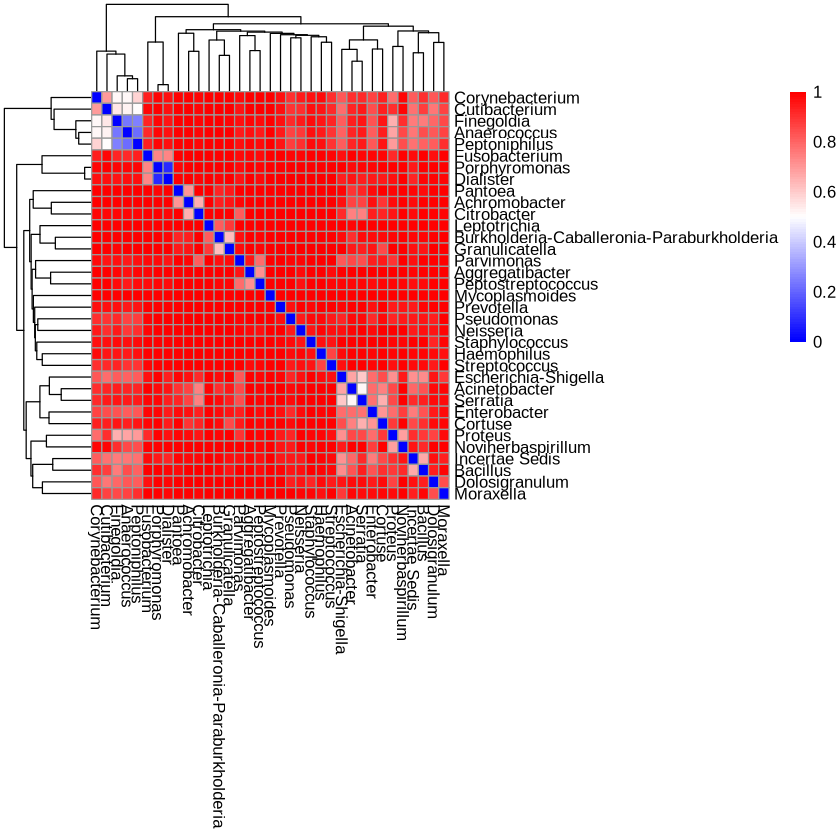

In [35]:
library(pheatmap)

pheatmap(as.matrix(dist_list[["bray"]]),
         clustering_distance_rows = "euclidean",
         clustering_distance_cols = "euclidean",
         color = colorRampPalette(c("blue", "white", "red"))(100))

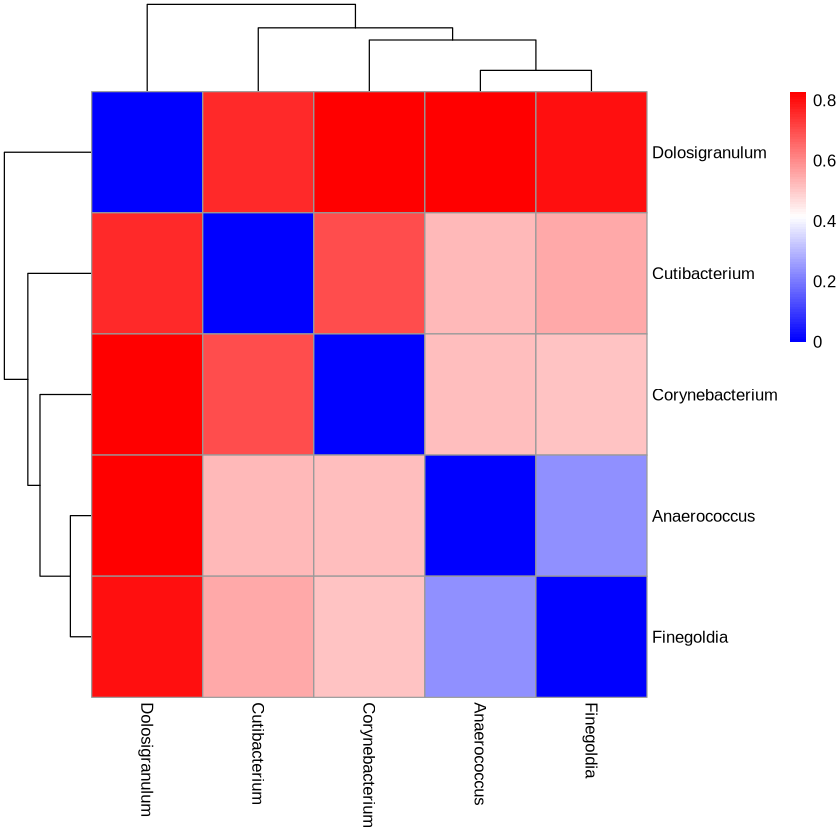

In [36]:
# Convert your Bray–Curtis distance object to a matrix
bray_mat <- as.matrix(dist_list[["bray"]])

# Select only the upper-left corner (e.g., first 5 genera)
subset_mat <- bray_mat[1:5, 1:5]

# Plot only that submatrix
pheatmap(subset_mat,
         clustering_distance_rows = "euclidean",
         clustering_distance_cols = "euclidean",
         color = colorRampPalette(c("blue", "white", "red"))(100))


In [38]:
# # Get all your abundance files
# abund_files <- list.files(pattern = "Abund_by_Timepoint_4_Corr_.*\\.tsv$")

# for (file in abund_files) {
#   message("\nProcessing: ", basename(file))

#   # 1) read: rows = samples, cols = genera
#   abund_df <- read.delim(file, check.names = FALSE, row.names = 1)

#   # 2) NA -> 0
#   abund_df[is.na(abund_df)] <- 0

#   # 3) TRANSPOSE so rows = genera, cols = samples  ✅
#   genus_by_sample <- as.data.frame(t(abund_df))

#   # 4) drop genera that are all zeros (avoid distance issues)
#   keep <- rowSums(genus_by_sample, na.rm = TRUE) > 0
#   genus_by_sample <- genus_by_sample[keep, , drop = FALSE]
#   if (nrow(genus_by_sample) < 2) {
#     message("  Skipping (fewer than 2 genera with nonzero abundance).")
#     next
#   }

#   # 5) compute Bray-Curtis distances
#   bray_dist <- vegdist(genus_by_sample, method = "bray")

#   # 6) Convert to matrix for plotting
#   bray_mat <- as.matrix(bray_dist)

#   # 7) Plot heatmap
#   pheatmap(
#     bray_mat,
#     main = paste0("Bray-Curtis distance — ", basename(file)),
#     clustering_distance_rows = "euclidean",
#     clustering_distance_cols = "euclidean"
#   )
# }

In [12]:
library(tidyverse)
library(vegan)
library(pairwiseAdonis)
library(stringr)

# Map samples to timepoints or surgery groups
time_group_map <- c(
  "T0" = "pre_surgery",
  "T1" = "early_post",
  "T3" = "early_post",
  "T6" = "late_post",
  "T12" = "late_post"
)

get_time_group <- function(id_sample) {
  tp <- str_extract(id_sample, "T[0-9]+")
  time_group_map[tp]
}

# 1) Merge all abundance files
abund_files <- list.files(path = "./", pattern = "Abund_by_Timepoint_4_Corr_.*\\.tsv$", full.names = TRUE)
abund_list <- lapply(abund_files, function(f) {
  df <- read.delim(f, check.names = FALSE, row.names = 1)
  df[is.na(df)] <- 0
  df %>% rownames_to_column(var = "ID_Sample")
})
all_abund <- bind_rows(abund_list)

# 2) Merge with metadata
merged_df <- all_abund %>%
  left_join(metadata_filtered %>% select(ID_Sample, ClinicCtrl), by = "ID_Sample") %>%
  filter(!is.na(ClinicCtrl))

# 3) Add surgery/time groups
merged_df$SurgeryGroup <- sapply(merged_df$ID_Sample, get_time_group)

# 4) Extract genus abundance matrix
genus_data <- merged_df %>% select(-ID_Sample, -ClinicCtrl, -SurgeryGroup)

# Replace NA with 0
genus_data <- genus_data %>% mutate(across(everything(), ~ ifelse(is.na(.), 0, .)))

# 5) Compute Bray-Curtis distance
bc_dist <- vegdist(genus_data, method = "bray")

# 6) Run PERMANOVA across time (or surgery group) + clinic control
permanova_result1 <- adonis2(bc_dist ~ SurgeryGroup + ClinicCtrl, data = merged_df, permutations = 999)

## across time
permanova_result2 <- adonis2(bc_dist ~ SurgeryGroup, data = merged_df, permutations = 999)

# 7) Optionally run pairwise comparisons for SurgeryGroup
pairwise_result <- pairwise.adonis(genus_data, factors = merged_df$SurgeryGroup, sim.method = "bray", p.adjust.m = "bonferroni")

# 8) Inspect results
permanova_result1
permanova_result2
pairwise_result

Loading required package: cluster



,Df,SumOfSqs,R2,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Model,4,1.802205,0.04855944,1.824602,0.012
Residual,143,35.311180,0.95144056,NA,NA
Total,147,37.113385,1.00000000,NA,NA


,Df,SumOfSqs,R2,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Model,2,1.282112,0.03454581,2.59419,0.007
Residual,145,35.831273,0.96545419,NA,NA
Total,147,37.113385,1.00000000,NA,NA


pairs,Df,SumsOfSqs,F.Model,R2,p.value,p.adjusted,sig
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
pre_surgery vs early_post,1,1.0795118,4.2814391,0.04145410,0.004,0.012,.
pre_surgery vs late_post,1,0.2444912,0.9303151,0.01121803,0.453,1.000,
early_post vs late_post,1,0.5422040,2.3498224,0.02110306,0.037,0.111,


In [32]:
# Ensure SurgeryGroup is a factor with correct levels
merged_df$SurgeryGroup <- factor(merged_df$SurgeryGroup, 
                                 levels = c("pre_surgery", "early_post", "late_post"))

# Compute Bray-Curtis distance matrix
bc_dist <- vegdist(genus_data, method = "bray")

# Extract distances to pre-surgery samples
pre_idx <- merged_df$SurgeryGroup == "pre_surgery"

# Compute centroid of pre-surgery group
pre_centroid <- colMeans(as.matrix(genus_data[pre_idx, ]))

# Function to compute Bray-Curtis distance to centroid
bray_to_centroid <- function(x, centroid) {
  sum(abs(x - centroid)) / sum(x + centroid)
}

# Apply to all samples
dist_to_pre <- apply(genus_data, 1, bray_to_centroid, centroid = pre_centroid)

# Add to metadata
plot_df <- merged_df %>%
  mutate(DistanceToPre = dist_to_pre)

# Plot
a <- ggplot(plot_df, aes(x = SurgeryGroup, y = DistanceToPre, fill = ClinicCtrl)) +
  geom_boxplot(outlier.shape = 21, alpha = 0.7) +
  geom_jitter(width = 0.2, size = 2, alpha = 0.6) +
  theme_bw() +
  labs(
    title = "Distance to Pre-Surgery Microbiota",
    x = "Surgery Group",
    y = "Bray-Curtis Distance to Pre-Surgery",
    fill = "Clinical Control"
  ) +
  scale_fill_manual(values = c(
    "C"  = "#e41a1c",   # red
    "NC" = "#377eb8",   # blue
    "PC" = "#4daf4a"    # green
  )) +
  ylim(0.15, 1.25) +
  theme(
    plot.title   = element_text(face = "bold", size = 14),
    axis.title.x = element_text(face = "bold", size = 12),
    axis.title.y = element_text(face = "bold", size = 12),
    axis.text.x  = element_text(face = "bold", size = 10),
    axis.text.y  = element_text(face = "bold", size = 10),
    legend.title = element_text(face = "bold", size = 12),
    legend.text  = element_text(face = "bold", size = 10)
  )

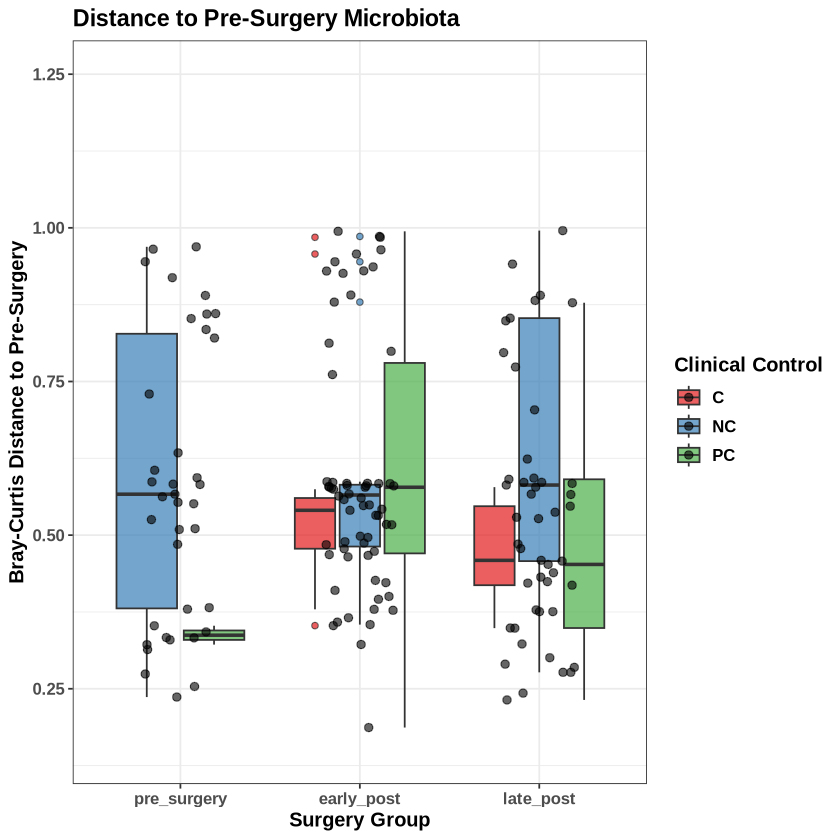

In [33]:
a

In [34]:
ggsave("microbiota_BCdist_presurgery_sig.png", plot = a, width = 10, height = 12, dpi = 300)

In [51]:
library(tidyverse)
library(FSA)        # for dunnTest
library(rstatix)    # for kruskal_test, pairwise comparisons
library(stringr)

# # 1) Build combined grouping variable

# plot_df <- plot_df %>%
#   mutate(Group = paste(ClinicCtrl, SurgeryGroup, sep = "_"))

# print(head(plot_df))

# 2) Prepare genus-only abundance matrix
genus_data <- plot_df %>%
  select(-ID_Sample, -ClinicCtrl, -SurgeryGroup, -DistanceToPre, -Group)
# print(head(genus_data))
genus_data <- genus_data %>% mutate(across(everything(), ~ ifelse(is.na(.), 0, .))) # REPLACE NA with 0

# 3) Run Kruskal–Wallis per genus
kruskal_results_time <- genus_data %>%
  pivot_longer(cols = everything(), names_to = "Genus", values_to = "Abundance") %>%
  bind_cols(SurgeryGroup = rep(plot_df$SurgeryGroup, times = ncol(genus_data))) %>%
  group_by(Genus) %>%
  kruskal_test(Abundance ~ SurgeryGroup) %>%
  arrange(p)   # sort by smallest p-value

# kruskal_results_time

# # 4) Filter significant genera (p < 0.05)
# sig_genera <- kruskal_results %>% filter(p < 0.05)
# sig_genera

# # 5) Post-hoc Dunn’s test on significant genera
# dunn_results <- list()

# for(g in sig_genera$Genus) {
#   d <- plot_df %>%
#     select(Group, all_of(g)) %>%
#     rename(Abundance = all_of(g))
  
#   dunn_results[[g]] <- dunnTest(Abundance ~ Group, data = d, method = "bonferroni")$res
# }
# dunn_results

bc_dist <- vegdist(genus_data, method = "bray")

# PERMANOVA across surgery timepoints
permanova_time <- adonis2(
  bc_dist ~ SurgeryGroup,
  data = merged_df,   # must have SurgeryGroup column
  permutations = 999, # number of permutations
  by = "margin"       # gives marginal effects
)

print(permanova_time)

pairwise_permanova <- pairwise.adonis(
  x = genus_data,                  # abundance matrix
  factors = merged_df$SurgeryGroup, # factor defining groups
  sim.method = "bray",             # Bray-Curtis distance
  p.adjust.m = "bonferroni"        # adjust p-values for multiple comparisons
)

# Inspect results
pairwise_permanova

Permutation test for adonis under reduced model
Marginal effects of terms
Permutation: free
Number of permutations: 999

adonis2(formula = bc_dist ~ SurgeryGroup, data = merged_df, permutations = 999, by = "margin")
              Df SumOfSqs      R2      F Pr(>F)  
SurgeryGroup   2    1.282 0.03455 2.5942  0.012 *
Residual     145   35.831 0.96545                
Total        147   37.113 1.00000                
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


pairs,Df,SumsOfSqs,F.Model,R2,p.value,p.adjusted,sig
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
pre_surgery vs early_post,1,1.0795118,4.2814391,0.04145410,0.002,0.006,*
pre_surgery vs late_post,1,0.2444912,0.9303151,0.01121803,0.450,1.000,
early_post vs late_post,1,0.5422040,2.3498224,0.02110306,0.051,0.153,


Warning message:
“The following aesthetics were dropped during statistical transformation: shape.
ℹ This can happen when ggplot fails to infer the correct grouping structure in the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical variable into a factor?”
Warning message:
“The following aesthetics were dropped during statistical transformation: shape.
ℹ This can happen when ggplot fails to infer the correct grouping structure in the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical variable into a factor?”


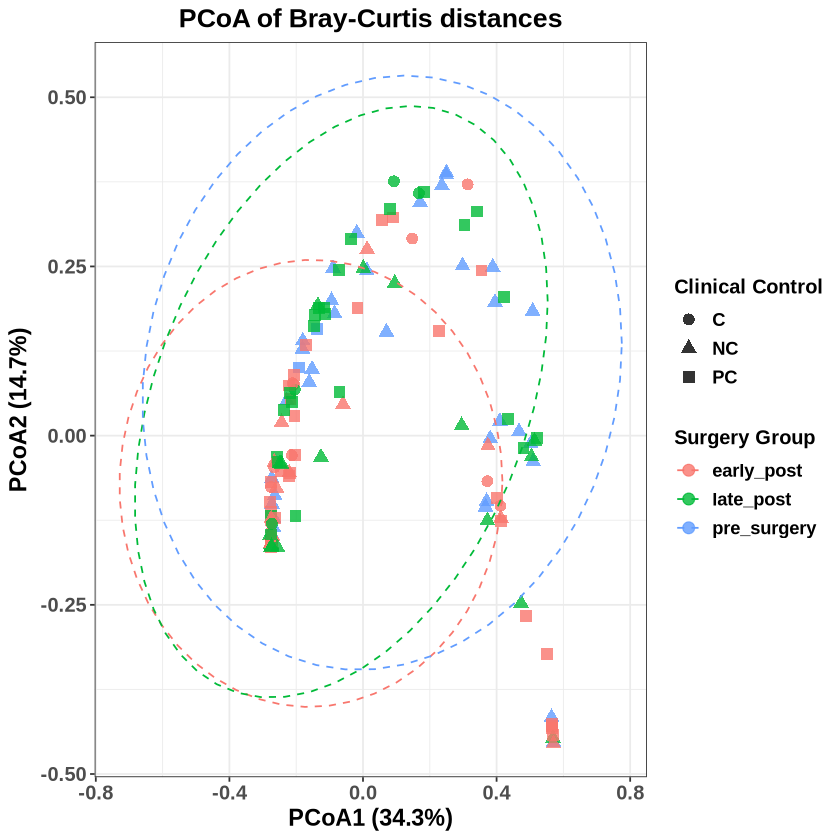

In [131]:
# Perform PCoA
pcoa_res <- cmdscale(bc_dist, eig = TRUE, k = 2)  # 2D

# Compute proportion of variance explained
eig_vals <- pcoa_res$eig
var_explained <- round(100 * eig_vals[1:2] / sum(eig_vals[eig_vals > 0]), 1)

# Create PCoA data frame
pcoa_df <- as.data.frame(pcoa_res$points)
colnames(pcoa_df) <- c("PCoA1", "PCoA2")

# Add metadata
pcoa_df$SurgeryGroup <- merged_df$SurgeryGroup
pcoa_df$ClinicCtrl <- merged_df$ClinicCtrl

# Plot with variance explained in axis labels
pcoa_plot_combined <- ggplot(pcoa_df, aes(x = PCoA1, y = PCoA2, color = SurgeryGroup, shape = ClinicCtrl)) +
  geom_point(size = 3, alpha = 0.8) +
  stat_ellipse(aes(group = SurgeryGroup), type = "t", linetype = 2) +
  theme_bw() +
  theme(
    plot.title = element_text(face = "bold", size = 16, hjust = 0.5),
    axis.title = element_text(face = "bold", size = 14),
    axis.text = element_text(face = "bold", size = 12),
    legend.title = element_text(face = "bold", size = 12),
    legend.text = element_text(face = "bold", size = 11)
  ) +
  labs(
    title = "PCoA of Bray-Curtis distances",
    x = paste0("PCoA1 (", var_explained[1], "%)"),
    y = paste0("PCoA2 (", var_explained[2], "%)"),
    color = "Surgery Group",
    shape = "Clinical Control"
  )

# Display
pcoa_plot_combined

# Save
ggsave("PCoA_BrayCurtis_Combined_Bold.png", plot = pcoa_plot_combined,
       width = 10, height = 6, dpi = 300)

Too few points to calculate an ellipse
Warning message:
“Removed 1 row containing missing values or values outside the scale range (`geom_path()`).”


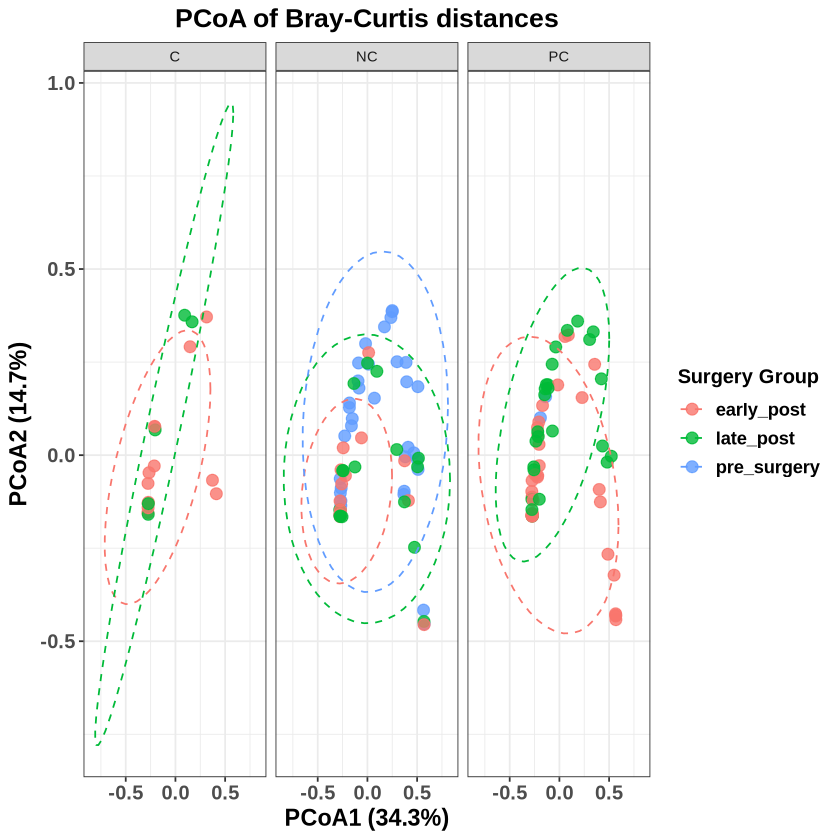

In [133]:
ggplot(pcoa_df, aes(x = PCoA1, y = PCoA2, color = SurgeryGroup)) +
  geom_point(size = 3, alpha = 0.8) +
  stat_ellipse(aes(group = SurgeryGroup), type = "t", linetype = 2) +
  theme_bw() +
  theme(
    plot.title = element_text(face = "bold", size = 16, hjust = 0.5),
    axis.title = element_text(face = "bold", size = 14),
    axis.text = element_text(face = "bold", size = 12),
    legend.title = element_text(face = "bold", size = 12),
    legend.text = element_text(face = "bold", size = 11)) + 
  facet_wrap(~ ClinicCtrl) +  # Separate plot for each Clinical Control
  labs(title = "PCoA of Bray-Curtis distances",
       x = paste0("PCoA1 (", var_explained[1], "%)"),
       y = paste0("PCoA2 (", var_explained[2], "%)"),
       color = "Surgery Group")

In [130]:
getwd()

[1] "/home/strawberry/Documents/Collaborations/sinusite_edwin/data"

Too few points to calculate an ellipse
Warning message:
“Removed 1 row containing missing values or values outside the scale range (`geom_path()`).”
Too few points to calculate an ellipse
Warning message:
“Removed 1 row containing missing values or values outside the scale range (`geom_path()`).”


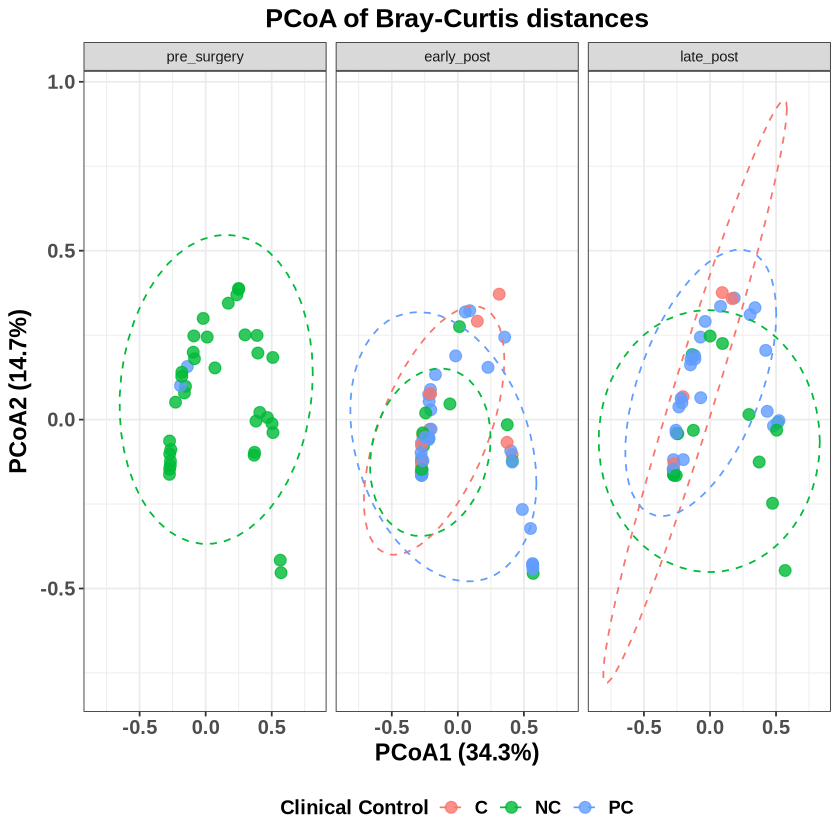

In [134]:
pcoa_df$SurgeryGroup <- factor(
  pcoa_df$SurgeryGroup,
  levels = c("pre_surgery", "early_post", "late_post")
)

# Create PCoA plot and assign to a variable
pcoa_plot <- ggplot(pcoa_df, aes(x = PCoA1, y = PCoA2, color = ClinicCtrl)) +
  geom_point(size = 3, alpha = 0.8) +
  stat_ellipse(aes(group = ClinicCtrl), type = "t", linetype = 2) +
  facet_wrap(~ SurgeryGroup) +
  theme_bw() +
  theme(
    plot.title = element_text(face = "bold", size = 16, hjust = 0.5),
    axis.title = element_text(face = "bold", size = 14),
    axis.text = element_text(face = "bold", size = 12),
    legend.title = element_text(face = "bold", size = 12),
    legend.text = element_text(face = "bold", size = 11)) + 
  theme(legend.position = "bottom") +
  labs(title = "PCoA of Bray-Curtis distances",
       x = paste0("PCoA1 (", var_explained[1], "%)"),
       y = paste0("PCoA2 (", var_explained[2], "%)"),
       color = "Clinical Control")

# Display the plot
pcoa_plot

# Save plot to file
ggsave("PCoA_BrayCurtis_SurgeryGroups.png", plot = pcoa_plot,
       width = 10, height = 6, dpi = 300)

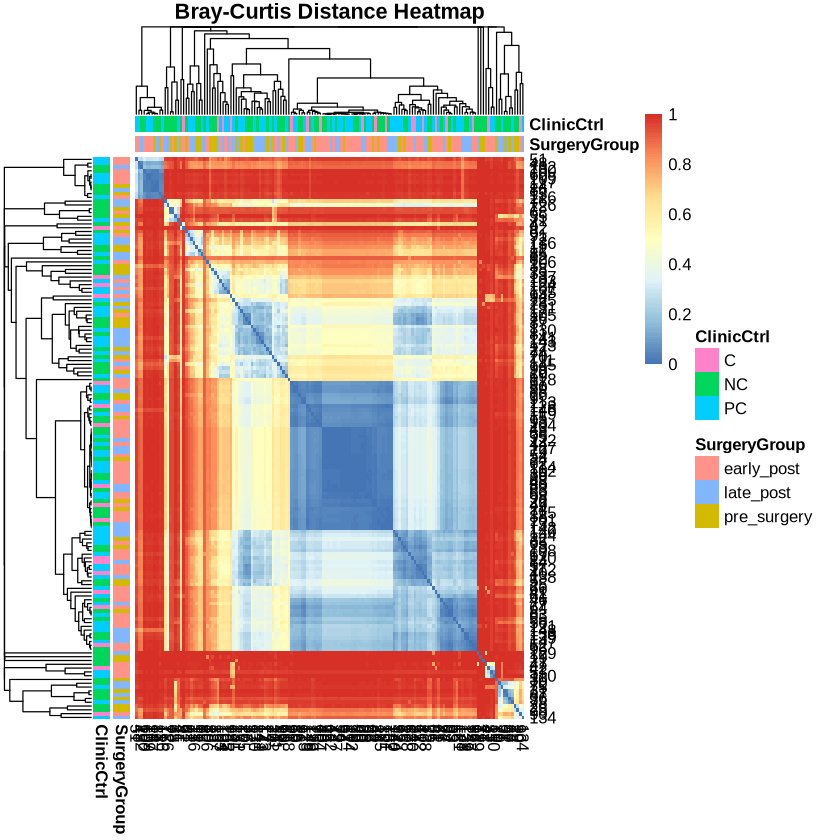

In [121]:
library(pheatmap)

# Distance matrix to heatmap
pheatmap(as.matrix(bc_dist),
         annotation_row = merged_df[, c("SurgeryGroup", "ClinicCtrl")],
         annotation_col = merged_df[, c("SurgeryGroup", "ClinicCtrl")],
         clustering_distance_rows = bc_dist,
         clustering_distance_cols = bc_dist,
         main = "Bray-Curtis Distance Heatmap")


In [179]:
print(head(abund_df))

    ID_Sample Anaerococcus  Bacillus Enterobacter Fusobacterium Granulicatella
1 0001967K_T6  0.003613631 0.1120225   0.05781809   0.003613631    0.003613631
2 0110059G_T6  8.805031447 0.0000000   0.00000000   2.201257862    0.000000000
3 0130765A_T6 23.972602740 0.0000000   0.00000000   0.443190975    0.000000000
4 0236549G_T6  0.865650970 0.3116343   3.94736842   3.150969529    0.000000000
5 0332596H_T6  0.000000000 0.0000000   0.00000000   0.000000000    0.000000000
6 0492882D_T6  0.000000000 0.0000000   0.45834457   0.000000000    0.000000000
  Parvimonas Peptoniphilus     Proteus Staphylococcus Corynebacterium
1  0.1337043    0.01084089 0.003613631       524.5510      0.00000000
2  0.0000000   13.46960168 3.039832285       174.4235      4.24528302
3  0.0000000   16.43835616 0.282030620        97.5423      2.13537470
4  8.5872576    0.72714681 0.000000000       227.5970      0.76177285
5  0.0000000    0.00000000 0.000000000       272.8992      0.00000000
6  0.0000000    0.00000000 

In [182]:
print(head(abund_df))

    ID_Sample Anaerococcus Corynebacterium Cutibacterium Dolosigranulum
1 0088303G_T0    0.6011422       5.6807935     0.1502855    14.93838293
2 0110059G_T0   11.0485269       0.5199307     5.8925477     6.15251300
3 0130765A_T0   10.6796117       0.8252427     1.1650485     0.04854369
4 0207720E_T0    0.7651841       0.0000000     0.1912960     0.11956002
5 0236549G_T0    0.7183908      25.6465517     0.8620690     2.51436782
6 0313863D_T0    0.3693592       1.1883732     0.1927092    91.77774209
  Finegoldia Haemophilus Incertae Sedis Peptoniphilus Porphyromonas Pseudomonas
1 0.81154193   0.1803427      1.1722272     0.7213706    0.12022843  0.06011422
2 5.63258232   2.7296360      0.4766031    21.4904679    0.04332756  3.46620451
3 5.82524272   1.7961165      1.2621359    10.7766990    0.00000000 14.70873786
4 0.07173601   0.0000000      0.1195600     0.2869440    0.00000000  0.52606408
5 0.14367816   0.0000000      0.1436782     0.4310345    0.00000000  5.45977011
6 0.06423639   0

In [69]:
# merge with metadata
abund_meta <- merged_df %>%
  select(ID_Sample, SurgeryGroup, ClinicCtrl) %>%
  left_join(abund_df, by = "ID_Sample")
print(head(abund_meta))

ERROR: [1m[33mError[39m in `left_join()`:[22m
[1m[22m[33m![39m Join columns in `y` must be present in the data.
[31m✖[39m Problem with `ID_Sample`.


In [187]:
library(pheatmap)
library(dplyr)

surgery_groups <- unique(abund_meta$SurgeryGroup)

for (group in surgery_groups) {
  
  group_data <- abund_meta %>%
    filter(SurgeryGroup == group)
  
  # Abundance matrix: rows = genera, columns = samples
  mat <- t(group_data[, -(1:3)])
  colnames(mat) <- group_data$ID_Sample
  rownames(mat) <- colnames(group_data)[-(1:3)]
  
  # Replace zeros with small pseudo-counts
  mat[mat == 0] <- 1e-6
  
  # Log-transform
  mat <- log10(mat + 1)
  
  # Remove genera with zero variance (same value across all samples)
  mat <- mat[apply(mat, 1, var) > 0, ]
  
  # Remove samples with zero variance (optional)
  mat <- mat[, apply(mat, 2, var) > 0]
  
  # Sample annotations (only for remaining samples)
  ann_sub <- group_data %>%
    filter(ID_Sample %in% colnames(mat)) %>%
    select(SurgeryGroup, ClinicCtrl) %>%
    as.data.frame()
  rownames(ann_sub) <- colnames(mat)
  
  # Only plot if matrix is not empty
  if(nrow(mat) > 1 & ncol(mat) > 1){
    pheatmap(mat,
             annotation_col = ann_sub,
             cluster_rows = TRUE,
             cluster_cols = TRUE,
             main = paste("Genus Abundance Heatmap -", group),
             show_rownames = TRUE,
             show_colnames = TRUE,
             fontsize_row = 8,
             fontsize_col = 8)
  } else {
    message("Skipping group ", group, ": not enough data after filtering")
  }
}


ERROR: Error in get(as.character(FUN), mode = "function", envir = envir): object 'NSAID_Intolerance' of mode 'function' was not found


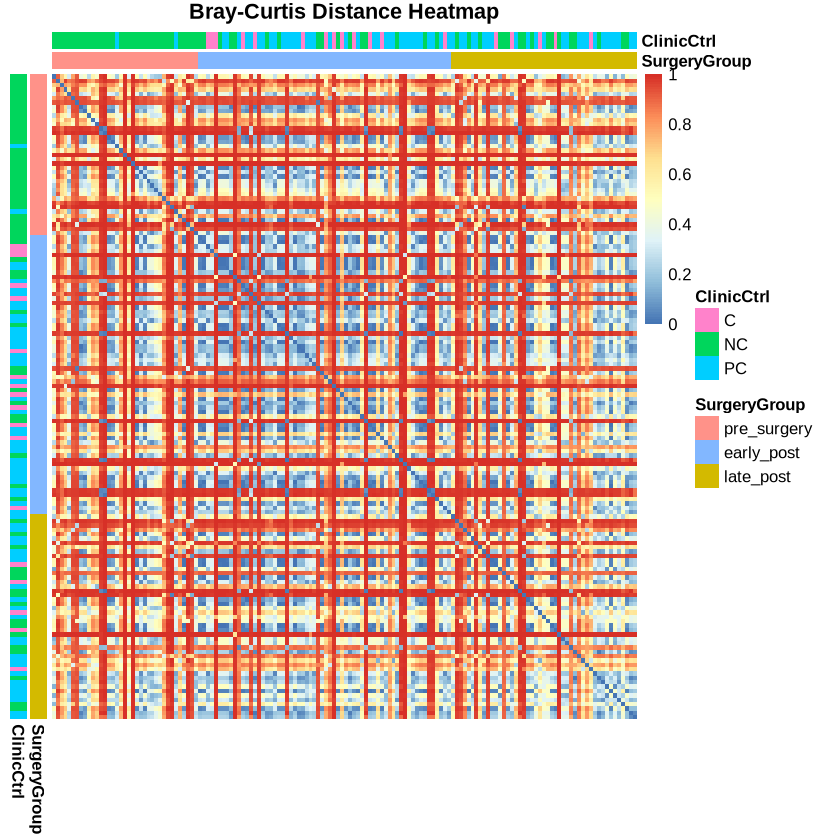

In [172]:
# ----- 1. Convert distance vector to square matrix -----
# Assuming bc_dist is a dist object
bc_mat <- as.matrix(bc_dist)

# Ensure row/column names match ID_Sample
rownames(bc_mat) <- pcoa_df$ID_Sample
colnames(bc_mat) <- pcoa_df$ID_Sample

# ----- 2. Order samples by SurgeryGroup -----
pcoa_df_ordered <- pcoa_df %>%
  arrange(SurgeryGroup)

ordered_samples <- pcoa_df_ordered$ID_Sample
bc_mat_ordered <- bc_mat[ordered_samples, ordered_samples]

# ----- 3. Subset annotations -----
annotations <- pcoa_df_ordered %>%
  select(SurgeryGroup, ClinicCtrl) %>%
  as.data.frame()
rownames(annotations) <- ordered_samples

# ----- 4. Create heatmap -----
pheatmap(bc_mat_ordered,
         annotation_row = annotations,
         annotation_col = annotations,
         cluster_rows = FALSE,      # keep SurgeryGroup order
         cluster_cols = FALSE,      # keep SurgeryGroup order
         main = "Bray-Curtis Distance Heatmap",
         show_rownames = FALSE,
         show_colnames = FALSE)

In [199]:
library(dplyr)
library(tidyr)
library(FSA)  # for dunnTest

# Map timepoints to SurgeryGroup
time_group_map <- c(
  "T0" = "pre_surgery",
  "T1" = "early_post",
  "T3" = "early_post",
  "T6" = "late_post",
  "T12" = "late_post"
)

run_kw_dunn_grouped_filtered <- function(file_path, metadata_df, time_group_map, kw_threshold = 0.05) {
  
  # Load abundance table and reshape to long format
  abund_df <- read.delim(file_path, check.names = FALSE, row.names = 1) %>%
    rownames_to_column("ID_Sample") %>%
    pivot_longer(-ID_Sample, names_to = "Genus", values_to = "RelAbundance")
  
  # Merge with metadata
  df <- abund_df %>%
    left_join(metadata_df %>% select(ID_Sample, ClinicCtrl, SurgeryGroup), by = "ID_Sample") %>%
    filter(!is.na(ClinicCtrl))
  
  # Infer SurgeryGroup from Timepoint if missing
  df <- df %>%
    mutate(
      Timepoint = gsub(".*_T([0-9]+)$", "T\\1", ID_Sample),
      SurgeryGroup = ifelse(is.na(SurgeryGroup), time_group_map[Timepoint], SurgeryGroup),
      Group = paste(SurgeryGroup, ClinicCtrl, sep = "_")
    )
  
  # Kruskal-Wallis per genus
  kw_results <- df %>%
    group_by(Genus) %>%
    summarise(
      p_kw = kruskal.test(RelAbundance ~ Group)$p.value,
      .groups = "drop"
    ) %>%
    mutate(p_adjusted = p.adjust(p_kw, method = "BH")) %>%
    arrange(p_adjusted)
  
  # Filter genera for Dunn's test based on threshold
  genera_to_test <- kw_results %>%
    filter(p_adjusted <= kw_threshold) %>%
    pull(Genus)
  
  if(length(genera_to_test) == 0) {
    dunn_results <- data.frame()  # Return empty if no genus passes threshold
  } else {
    dunn_results <- df %>%
      filter(Genus %in% genera_to_test) %>%
      group_by(Genus) %>%
      do({
        dunnTest(RelAbundance ~ Group, data = ., method = "bonferroni")$res
      }) %>%
      ungroup() %>%
      arrange(Genus, P.adj)
  }
  
  # Return results
  list(
    Timepoint = basename(file_path),
    KW = kw_results,
    Dunn = dunn_results
  )
}

# Apply across all abundance files
kw_dunn_results_grouped_filtered <- lapply(abund_files, run_kw_dunn_grouped_filtered,
                                           metadata_df = merged_df,
                                           time_group_map = time_group_map,
                                           kw_threshold = 0.05)

# Assign timepoint names
names(kw_dunn_results_grouped_filtered) <- gsub(".*Abund_by_Timepoint_4_Corr_(T[0-9]+)\\.tsv$", "\\1", abund_files)

Warning message:
“Group was coerced to a factor.”
Warning message:
“Group was coerced to a factor.”


In [206]:
library(dplyr)
library(tidyr)
library(FSA)  # for dunnTest

# Function: KW + Dunn on combined groups
run_kw_dunn_grouped_combined <- function(abund_files, metadata_df, time_group_map, kw_threshold = 0.05) {
  
  # Merge all abundance tables
  abund_df <- lapply(abund_files, function(f) {
    read.delim(f, check.names = FALSE, row.names = 1) %>%
      rownames_to_column("ID_Sample") %>%
      pivot_longer(-ID_Sample, names_to = "Genus", values_to = "RelAbundance") %>%
      mutate(Timepoint = gsub(".*_T([0-9]+)$", "T\\1", ID_Sample))
  }) %>% bind_rows()
  
  # Merge with metadata and create combined factor
  df <- abund_df %>%
    left_join(metadata_df %>% select(ID_Sample, ClinicCtrl, SurgeryGroup), by = "ID_Sample") %>%
    mutate(
      SurgeryGroup = ifelse(is.na(SurgeryGroup), time_group_map[Timepoint], SurgeryGroup),
      Group = paste(SurgeryGroup, ClinicCtrl, sep = "_")
    ) %>%
    filter(!is.na(ClinicCtrl))
  
  # Kruskal-Wallis per genus
  kw_results <- df %>%
    group_by(Genus) %>%
    summarise(
      p_kw = kruskal.test(RelAbundance ~ Group)$p.value,
      .groups = "drop"
    ) %>%
    mutate(p_adjusted = p.adjust(p_kw, method = "BH")) %>%
    arrange(p_adjusted)
  
  # Select only genera with significant KW p_adj
  sig_genera <- kw_results %>% filter(p_adjusted <= kw_threshold) %>% pull(Genus)
  
  if(length(sig_genera) == 0){
    dunn_results <- data.frame()
    message("No genera passed the KW adjusted p-value threshold.")
  } else {
    # Dunn's test only on significant genera
    dunn_results <- df %>%
      filter(Genus %in% sig_genera) %>%
      group_by(Genus) %>%
      do({
        dunnTest(RelAbundance ~ Group, data = ., method = "bonferroni")$res
      }) %>%
      ungroup() %>%
      arrange(Genus, P.adj)
  }
  
  # Return only significant results for printing
  list(
    KW_significant = kw_results %>% filter(p_adjusted <= kw_threshold),
    Dunn = dunn_results
  )
}

# Run function
kw_dunn_results_combined <- run_kw_dunn_grouped_combined(
  abund_files = abund_files,
  metadata_df = merged_df,
  time_group_map = time_group_map,
  kw_threshold = 0.05
)

# Print only significant KW results
print(kw_dunn_results_combined$KW_significant)

# Print Dunn results (only for significant genera)
print(kw_dunn_results_combined$Dunn)


Warning message:
“Group was coerced to a factor.”
Warning message:
“Group was coerced to a factor.”
Warning message:
“Group was coerced to a factor.”
Warning message:
“Group was coerced to a factor.”
Warning message:
“Group was coerced to a factor.”
Warning message:
“Group was coerced to a factor.”
Warning message:
“Group was coerced to a factor.”
Warning message:
“Group was coerced to a factor.”
Warning message:
“Group was coerced to a factor.”


# A tibble: 9 × 3
  Genus               p_kw p_adjusted
  <chr>              <dbl>      <dbl>
1 Anaerococcus    0.000234    0.00360
2 Dolosigranulum  0.000317    0.00360
3 Streptococcus   0.000178    0.00360
4 Cutibacterium   0.000658    0.00554
5 Finegoldia      0.000892    0.00554
6 Peptoniphilus   0.000977    0.00554
7 Corynebacterium 0.00245     0.0119 
8 Prevotella      0.00420     0.0179 
9 Porphyromonas   0.00721     0.0273 
# A tibble: 252 × 5
   Genus        Comparison                         Z  P.unadj   P.adj
   <chr>        <chr>                          <dbl>    <dbl>   <dbl>
 1 Anaerococcus late_post_NC - late_post_PC    -3.66 0.000248 0.00693
 2 Anaerococcus late_post_NC - pre_surgery_NC  -3.47 0.000520 0.0146 
 3 Anaerococcus early_post_NC - late_post_PC   -3.18 0.00149  0.0417 
 4 Anaerococcus late_post_C - late_post_NC      2.96 0.00312  0.0874 
 5 Anaerococcus early_post_NC - pre_surgery_NC -2.95 0.00315  0.0883 
 6 Anaerococcus early_post_PC - late_post_PC   -2.70 0

In [213]:
library(dplyr)
library(tidyr)
library(FSA)  # for dunnTest

run_kw_dunn_by_surgery <- function(abund_files, metadata_df, time_group_map, kw_threshold = 0.05) {
  
  # Merge all abundance tables
  abund_df <- lapply(abund_files, function(f) {
    read.delim(f, check.names = FALSE, row.names = 1) %>%
      rownames_to_column("ID_Sample") %>%
      pivot_longer(-ID_Sample, names_to = "Genus", values_to = "RelAbundance") %>%
      mutate(Timepoint = gsub(".*_T([0-9]+)$", "T\\1", ID_Sample))
  }) %>% bind_rows()
  
  # Merge with metadata and assign SurgeryGroup
  df <- abund_df %>%
    left_join(metadata_df %>% select(ID_Sample, ClinicCtrl, SurgeryGroup), by = "ID_Sample") %>%
    mutate(
      SurgeryGroup = ifelse(is.na(SurgeryGroup), time_group_map[Timepoint], SurgeryGroup)
    ) %>%
    filter(!is.na(ClinicCtrl))
  
  # Initialize lists to store results
  kw_results_list <- list()
  dunn_results_list <- list()
  
  # Loop over each SurgeryGroup
  for(group in unique(df$SurgeryGroup)) {
    df_sub <- df %>% filter(SurgeryGroup == group)
    
    # KW per genus within this SurgeryGroup
    kw_res <- df_sub %>%
      group_by(Genus) %>%
      summarise(
        p_kw = kruskal.test(RelAbundance ~ ClinicCtrl)$p.value,
        .groups = "drop"
      ) %>%
      mutate(p_adjusted = p.adjust(p_kw, method = "BH")) %>%
      arrange(p_adjusted)
    
    kw_results_list[[group]] <- kw_res
    
    # Dunn only for significant genera
    sig_genera <- kw_res %>% filter(p_adjusted <= kw_threshold) %>% pull(Genus)
    
    if(length(sig_genera) > 0) {
      dunn_res <- df_sub %>%
        filter(Genus %in% sig_genera) %>%
        group_by(Genus) %>%
        do({
          dunnTest(RelAbundance ~ ClinicCtrl, data = ., method = "bonferroni")$res
        }) %>%
        ungroup() %>%
        arrange(Genus, P.adj)
    } else {
      dunn_res <- data.frame()
    }
    
    dunn_results_list[[group]] <- dunn_res
  }
  
  list(
    KW_by_SurgeryGroup = kw_results_list,
    Dunn_by_SurgeryGroup = dunn_results_list
  )
}

# Run the function
kw_dunn_results_by_surgery <- run_kw_dunn_by_surgery(
  abund_files = abund_files,
  metadata_df = merged_df,
  time_group_map = time_group_map,
  kw_threshold = 0.05
)

# Example: inspect KW results for pre_surgery
head(kw_dunn_results_by_surgery$KW_by_SurgeryGroup$pre_surgery)

# Example: inspect Dunn results for pre_surgery
kw_dunn_results_by_surgery$Dunn_by_SurgeryGroup$pre_surgery


Warning message:
“ClinicCtrl was coerced to a factor.”
Warning message:
“ClinicCtrl was coerced to a factor.”
Warning message:
“ClinicCtrl was coerced to a factor.”
Warning message:
“ClinicCtrl was coerced to a factor.”


Genus,p_kw,p_adjusted
<chr>,<dbl>,<dbl>
Granulicatella,0.0003742586,0.01272479
Bacillus,0.0015205989,0.02585018
Dolosigranulum,0.0683670198,0.77482622
Achromobacter,0.6182508066,0.92142413
Acinetobacter,0.7978444998,0.92142413
Aggregatibacter,0.5720458767,0.92142413


Genus,Comparison,Z,P.unadj,P.adj
<chr>,<chr>,<dbl>,<dbl>,<dbl>
Bacillus,NC - PC,-3.170723,0.0015205989,0.0015205989
Granulicatella,NC - PC,-3.557600,0.0003742586,0.0003742586


In [214]:
head(kw_dunn_results_by_surgery$KW_by_SurgeryGroup$early_post)

Genus,p_kw,p_adjusted
<chr>,<dbl>,<dbl>
Finegoldia,0.05390090,0.3665261
Incertae Sedis,0.04999786,0.3665261
Noviherbaspirillum,0.04747182,0.3665261
Peptoniphilus,0.04745983,0.3665261
Proteus,0.04949383,0.3665261
Acinetobacter,0.17698204,0.7521737


In [215]:
# Example: inspect KW results for pre_surgery
head(kw_dunn_results_by_surgery$KW_by_SurgeryGroup$late_post)

# Example: inspect Dunn results for pre_surgery
kw_dunn_results_by_surgery$Dunn_by_SurgeryGroup$late_post


Genus,p_kw,p_adjusted
<chr>,<dbl>,<dbl>
Anaerococcus,0.0008511972,0.01404475
Cutibacterium,0.0008073485,0.01404475
Peptoniphilus,0.0070432621,0.07747588
Finegoldia,0.0096031107,0.07922566
Corynebacterium,0.0163023435,0.10759547
Prevotella,0.0450424751,0.24773361


Genus,Comparison,Z,P.unadj,P.adj
<chr>,<chr>,<dbl>,<dbl>,<dbl>
Anaerococcus,NC - PC,-3.3313003,0.000864413,0.002593239
Anaerococcus,C - NC,2.8466590,0.004418066,0.013254197
Anaerococcus,C - PC,0.8185271,0.413056274,1.000000000
Cutibacterium,C - NC,3.2142730,0.001307753,0.003923258
Cutibacterium,NC - PC,-3.0214532,0.002515645,0.007546935
Cutibacterium,C - PC,1.3991106,0.161779818,0.485339454


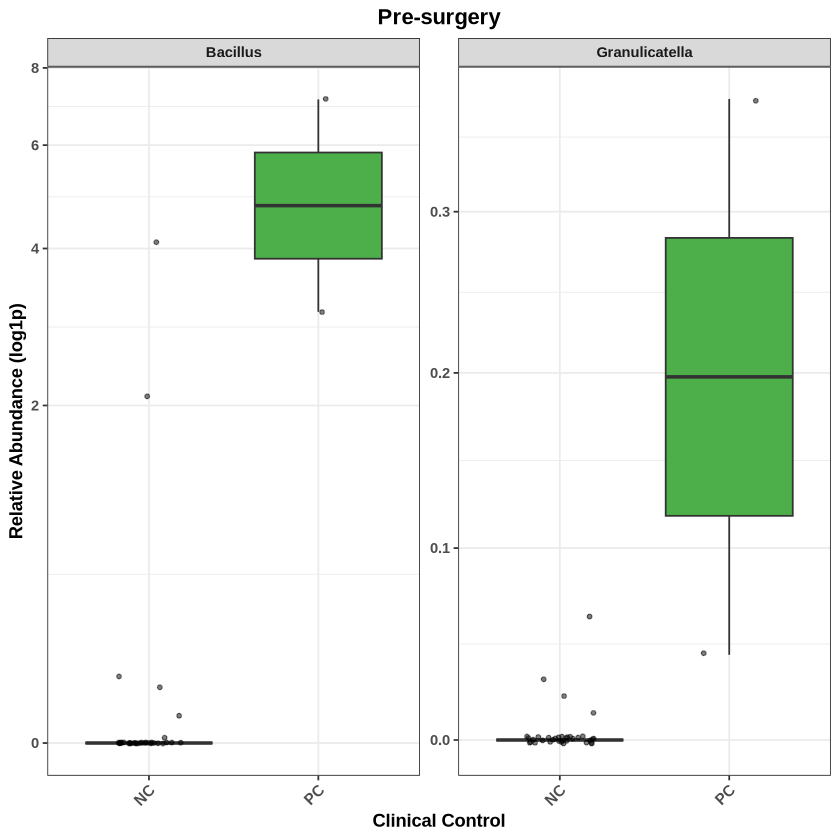

In [247]:
library(dplyr)
library(tidyr)
library(ggplot2)

# Filter significant genera for pre_surgery
sig_genera_pre <- kw_dunn_results_by_surgery$KW_by_SurgeryGroup$pre_surgery %>%
  filter(p_adjusted <= 0.05) %>%
  pull(Genus)

# Prepare abundance data for plotting
abund_pre <- lapply(abund_files, function(f) {
  read.delim(f, check.names = FALSE, row.names = 1) %>%
    rownames_to_column("ID_Sample") %>%
    pivot_longer(-ID_Sample, names_to = "Genus", values_to = "RelAbundance") %>%
    mutate(Timepoint = gsub(".*_T([0-9]+)$", "T\\1", ID_Sample))
}) %>% bind_rows() %>%
  left_join(merged_df %>% select(ID_Sample, ClinicCtrl, SurgeryGroup), by = "ID_Sample") %>%
  mutate(
    SurgeryGroup = ifelse(is.na(SurgeryGroup), time_group_map[Timepoint], SurgeryGroup)
  ) %>%
  filter(SurgeryGroup == "pre_surgery" & Genus %in% sig_genera_pre)

# Plot
b <- ggplot(abund_pre, aes(x = ClinicCtrl, y = RelAbundance, fill = ClinicCtrl)) +
  geom_boxplot(outlier.shape = NA) +
  geom_jitter(width = 0.2, alpha = 0.5, size = 1) +
  facet_wrap(~Genus, scales = "free_y") +
  scale_y_continuous(trans = "log1p") +  # log(x+1) transformation
  scale_fill_manual(values = c(
    "C" = "#e41a1c",
    "NC" = "#377eb8",
    "PC" = "#4daf4a"
  )) +
  theme_bw() +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1, face = "bold"),
    axis.text.y = element_text(face = "bold"),
    axis.title = element_text(face = "bold"),
    strip.text = element_text(face = "bold"),
    legend.position = "none",
    plot.title = element_text(face = "bold", hjust = 0.5)
  ) +
  labs(
    x = "Clinical Control",
    y = "Relative Abundance (log1p)",
    title = "Pre-surgery"
  )

b

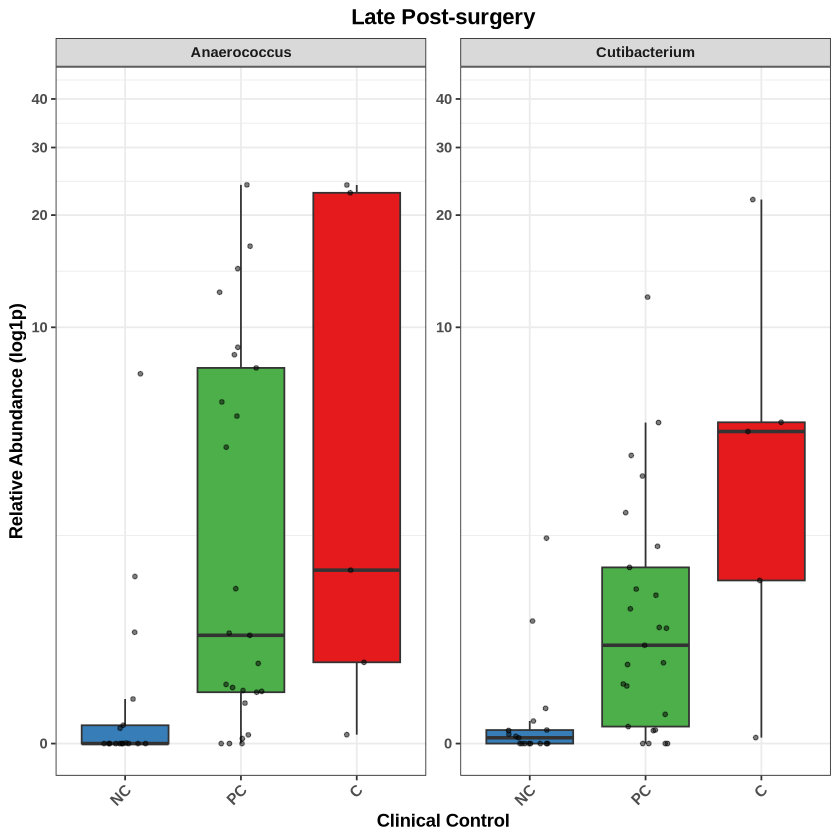

In [251]:
# Filter significant genera for late post surgery
sig_genera_late <- kw_dunn_results_by_surgery$KW_by_SurgeryGroup$late_post %>%
  filter(p_adjusted <= 0.05) %>%
  pull(Genus)

# Prepare abundance data for plotting
abund_late <- lapply(abund_files, function(f) {
  read.delim(f, check.names = FALSE, row.names = 1) %>%
    rownames_to_column("ID_Sample") %>%
    pivot_longer(-ID_Sample, names_to = "Genus", values_to = "RelAbundance") %>%
    mutate(Timepoint = gsub(".*_T([0-9]+)$", "T\\1", ID_Sample))
}) %>% bind_rows() %>%
  left_join(merged_df %>% select(ID_Sample, ClinicCtrl, SurgeryGroup), by = "ID_Sample") %>%
  mutate(
    SurgeryGroup = ifelse(is.na(SurgeryGroup), time_group_map[Timepoint], SurgeryGroup)
  ) %>%
  filter(SurgeryGroup == "late_post",
         Genus %in% sig_genera_late,
         !is.na(ClinicCtrl))   # <-- exclude NAs
abund_late <- abund_late %>%
  mutate(ClinicCtrl = factor(ClinicCtrl, levels = c("NC", "PC", "C")))

# Plot
a <- ggplot(abund_late, aes(x = ClinicCtrl, y = RelAbundance, fill = ClinicCtrl)) +
  geom_boxplot(outlier.shape = NA) +
  geom_jitter(width = 0.2, alpha = 0.5, size = 1) +
  facet_wrap(~Genus, scales = "free_y") +
  scale_y_continuous(trans = "log1p") +   # log(x+1) transformation
  scale_fill_manual(values = c(
    "C" = "#e41a1c",
    "NC" = "#377eb8",
    "PC" = "#4daf4a"
  )) +
  coord_cartesian(ylim = c(0, 40)) +      # fixed y-axis range
  theme_bw() +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1, face = "bold"),
    axis.text.y = element_text(face = "bold"),
    axis.title = element_text(face = "bold"),
    strip.text = element_text(face = "bold"),
    legend.position = "none",
    plot.title = element_text(face = "bold", hjust = 0.5)
  ) +
  labs(
    x = "Clinical Control",
    y = "Relative Abundance (log1p)",
    title = "Late Post-surgery"
  )

a

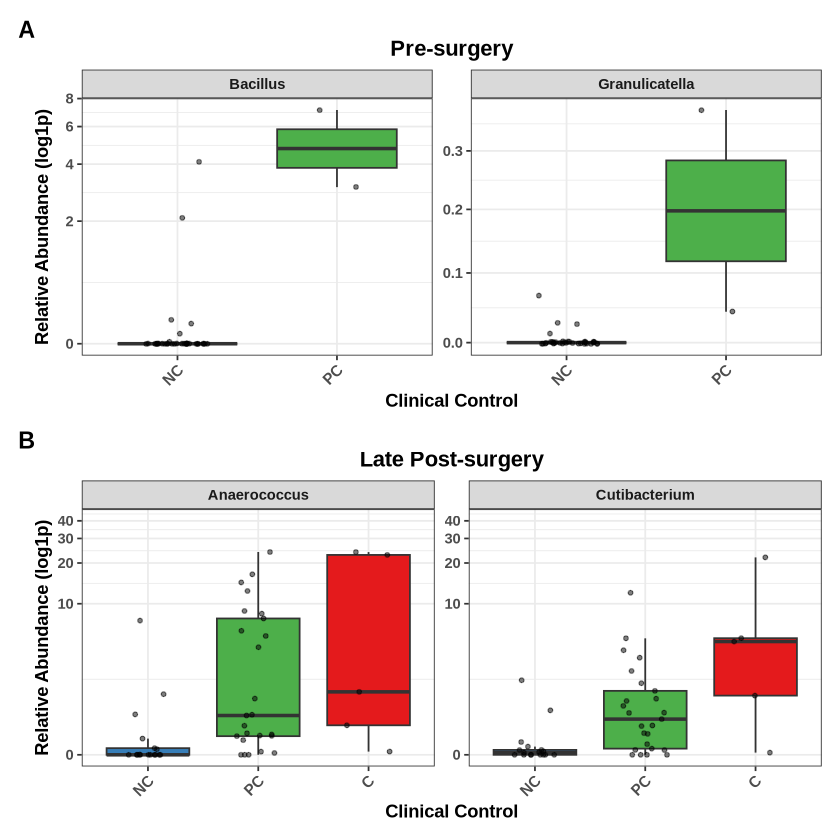

In [252]:
library(patchwork)

combined_plot <- b / a +
  plot_annotation(tag_levels = 'A') & 
  theme(plot.tag = element_text(face = "bold", size = 14))
combined_plot

ggsave("clinicCTRL_surgery_tp.png", plot = combined_plot,
       width = 10, height = 8, dpi = 300)

In [89]:
alpha_df <- read.delim("AlhaDiversity_Indexes.tsv", check.names = FALSE)
# Clean sample IDs (remove leading "X" if present)
alpha_df <- alpha_df %>%
  mutate(ID_Sample = gsub("^X", "", ID_Sample))

alpha_merged <- alpha_df %>%
  left_join(merged_df %>% select(ID_Sample, ClinicCtrl, SurgeryGroup), by = "ID_Sample") %>%
  filter(!is.na(ClinicCtrl), !is.na(SurgeryGroup), !is.na(Shannon))
print(head(alpha_merged))

  Observed     Chao1  se.chao1      ACE   se.ACE   Shannon  Simpson InvSimpson
1        5  5.000000 0.2236068  5.70059 1.103161 0.1102647 0.035554   1.036865
2        1  1.000000 0.0000000       NA       NA 0.0000000 0.000000   1.000000
3        1  1.000000 0.0000000       NA       NA 0.0000000 0.000000   1.000000
4        9  9.333333 0.9148009 10.57551 1.525651 0.5201432 0.231824   1.301785
5        1  1.000000 0.0000000       NA       NA 0.0000000 0.000000   1.000000
6       16 16.250000 0.7327750 17.89744 1.898376 1.3340343 0.529392   2.124911
     Fisher   ID_Sample ClinicCtrl SurgeryGroup
1 0.6863709 0001967K_T1         NC   early_post
2 0.1096721 0001967K_T3         NC   early_post
3 0.1096721 0001967K_T6         NC    late_post
4 1.3638955 0088303G_T0         NC  pre_surgery
5 0.1096721 0088303G_T1         NC   early_post
6 2.7048062 0110059G_T0         NC  pre_surgery


In [90]:
# Function: KW + Dunn for Shannon index
run_kw_dunn_shannon <- function(alpha_df, kw_threshold = 0.05) {
  kw_results_list <- list()
  dunn_results_list <- list()
  
  for(group in unique(alpha_df$SurgeryGroup)) {
    df_sub <- alpha_df %>% filter(SurgeryGroup == group)
    
    # KW test on Shannon
    kw_res <- kruskal.test(Shannon ~ ClinicCtrl, data = df_sub)
    kw_results_list[[group]] <- data.frame(
      SurgeryGroup = group,
      KW_p = kw_res$p.value,
      KW_p_adj = p.adjust(kw_res$p.value, method = "BH", n = length(unique(alpha_df$SurgeryGroup)))
    )
    
    # Dunn’s post-hoc if significant
    if(kw_results_list[[group]]$KW_p_adj <= kw_threshold) {
      dunn_res <- dunnTest(Shannon ~ ClinicCtrl, data = df_sub, method = "bonferroni")$res
      dunn_res$SurgeryGroup <- group
    } else {
      dunn_res <- data.frame()
    }
    dunn_results_list[[group]] <- dunn_res
  }
  
  list(
    KW_by_SurgeryGroup = kw_results_list,
    Dunn_by_SurgeryGroup = dunn_results_list
  )
}

In [93]:
kw_dunn_results_shannon <- run_kw_dunn_shannon(alpha_merged, kw_threshold = 0.06)
kw_dunn_results_shannon

Warning message:
“ClinicCtrl was coerced to a factor.”


$KW_by_SurgeryGroup
$KW_by_SurgeryGroup$early_post
  SurgeryGroup      KW_p KW_p_adj
1   early_post 0.7289245        1

$KW_by_SurgeryGroup$late_post
  SurgeryGroup       KW_p   KW_p_adj
1    late_post 0.01718489 0.05155467

$KW_by_SurgeryGroup$pre_surgery
  SurgeryGroup      KW_p KW_p_adj
1  pre_surgery 0.7369689        1


$Dunn_by_SurgeryGroup
$Dunn_by_SurgeryGroup$early_post
data frame with 0 columns and 0 rows

$Dunn_by_SurgeryGroup$late_post
  Comparison          Z     P.unadj      P.adj SurgeryGroup
1     C - NC  1.5569145 0.119490793 0.35847238    late_post
2     C - PC -0.1756953 0.860533296 1.00000000    late_post
3    NC - PC -2.7934296 0.005215238 0.01564572    late_post

$Dunn_by_SurgeryGroup$pre_surgery
data frame with 0 columns and 0 rows

In [94]:
# Initialize lists
kw_results_list <- list()
dunn_results_list <- list()

# Global Kruskal–Wallis on Shannon across SurgeryGroups
kw_p <- kruskal.test(Shannon ~ SurgeryGroup, data = alpha_merged)$p.value

kw_res <- data.frame(
  Test = "SurgeryGroup",
  p_kw = kw_p,
  p_adjusted = p.adjust(kw_p, method = "BH")
)

kw_results_list[["SurgeryGroup"]] <- kw_res

# Post-hoc Dunn’s test if KW significant
if(kw_res$p_adjusted <= 0.05) {
  dunn_res <- dunnTest(Shannon ~ SurgeryGroup, data = alpha_merged, method = "bonferroni")$res %>%
    mutate(Test = "SurgeryGroup")
} else {
  dunn_res <- data.frame()
}

dunn_results_list[["SurgeryGroup"]] <- dunn_res

# Collect results
kw_results <- do.call(rbind, kw_results_list)
dunn_results <- do.call(rbind, dunn_results_list)

# Inspect
kw_results
dunn_results


Warning message:
“SurgeryGroup was coerced to a factor.”


,Test,p_kw,p_adjusted
,<chr>,<dbl>,<dbl>
SurgeryGroup,SurgeryGroup,0.003734398,0.003734398


,Comparison,Z,P.unadj,P.adj,Test
,<chr>,<dbl>,<dbl>,<dbl>,<chr>
SurgeryGroup.1,early_post - late_post,-2.110694,0.034798629,0.104395888,SurgeryGroup
SurgeryGroup.2,early_post - pre_surgery,-3.215008,0.001304409,0.003913226,SurgeryGroup
SurgeryGroup.3,late_post - pre_surgery,-1.176242,0.239498238,0.718494713,SurgeryGroup


Warning message:
“Removed 7 rows containing missing values or values outside the scale range (`geom_point()`).”
Warning message:
“Removed 5 rows containing missing values or values outside the scale range (`geom_point()`).”


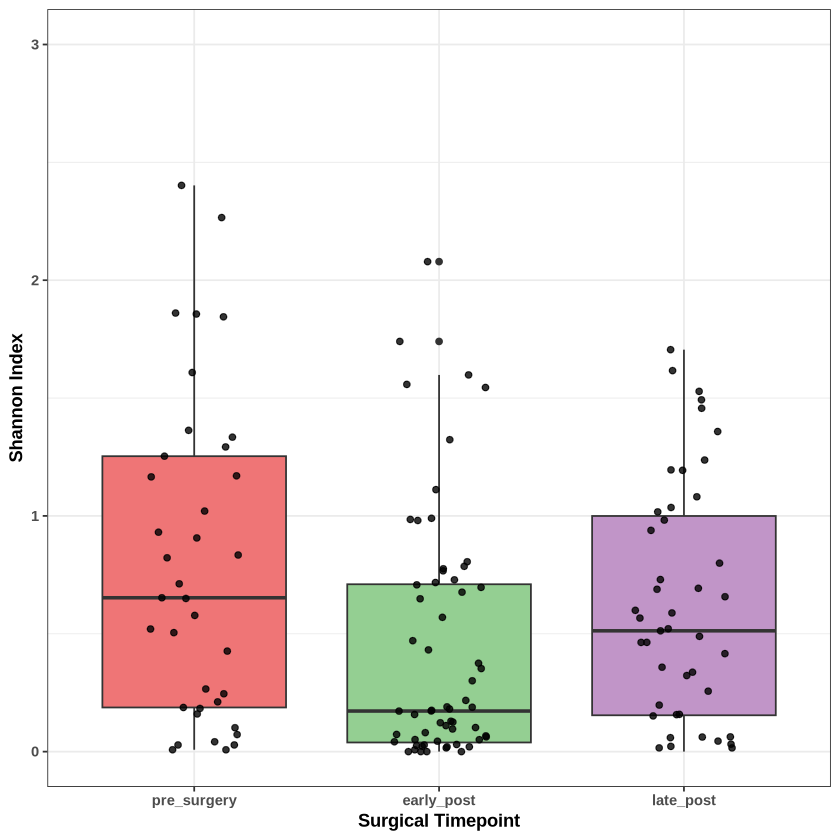

In [101]:
surgery_colors <- c(
  "pre_surgery" = "#ef7576",
  "early_post"  = "#94cf92",
  "late_post"   = "#c195c8"
)

# Make sure SurgeryGroup has the right order
alpha_merged$SurgeryGroup <- factor(alpha_merged$SurgeryGroup,
                                    levels = c("pre_surgery", "early_post", "late_post"))

# Plot function using SurgeryGroup instead of Timepoint
plot_alpha_diversity_surgery <- function() {
  ggplot(alpha_merged, aes(x = SurgeryGroup, y = Shannon)) +
    geom_boxplot(aes(fill = SurgeryGroup), alpha = 1.0) +
    scale_fill_manual(values = surgery_colors) +
    geom_jitter(width = 0.2, alpha = 0.8, color = "black") +
    theme_bw() +
    labs(x = "Surgical Timepoint",
         y = "Shannon Index") +
    scale_y_continuous(limits = c(0, 3.0)) +   # <-- restrict y-axis
    theme(
      legend.position = "none",
      axis.text.x = element_text(face = "bold"),
      axis.text.y = element_text(face = "bold"),
      axis.title = element_text(face = "bold")
    )
}

# Generate the plot
shannon_surgery_plot <- plot_alpha_diversity_surgery()
print(shannon_surgery_plot)

# Save it
ggsave("Shannon_AlphaDiv_Surgery_plot.png", plot = shannon_surgery_plot,
       width = 10, height = 8, dpi = 300)


In [105]:
getwd()

[1] "/home/strawberry/Documents/Collaborations/sinusite_edwin/data"

In [106]:
print(head(merged_df))

write.table(merged_df, file = "merged_df_190825.tsv", quote = FALSE, sep = "\t", row.names = FALSE)

    ID_Sample Anaerococcus Corynebacterium Cutibacterium Dolosigranulum
1 0088303G_T0    0.6011422       5.6807935     0.1502855    14.93838293
2 0110059G_T0   11.0485269       0.5199307     5.8925477     6.15251300
3 0130765A_T0   10.6796117       0.8252427     1.1650485     0.04854369
4 0207720E_T0    0.7651841       0.0000000     0.1912960     0.11956002
5 0236549G_T0    0.7183908      25.6465517     0.8620690     2.51436782
6 0313863D_T0    0.3693592       1.1883732     0.1927092    91.77774209
  Finegoldia Haemophilus Incertae Sedis Peptoniphilus Porphyromonas Pseudomonas
1 0.81154193   0.1803427      1.1722272     0.7213706    0.12022843  0.06011422
2 5.63258232   2.7296360      0.4766031    21.4904679    0.04332756  3.46620451
3 5.82524272   1.7961165      1.2621359    10.7766990    0.00000000 14.70873786
4 0.07173601   0.0000000      0.1195600     0.2869440    0.00000000  0.52606408
5 0.14367816   0.0000000      0.1436782     0.4310345    0.00000000  5.45977011
6 0.06423639   0

In [110]:
# Ensure AntUse is logical (TRUE/FALSE)
merged_df <- merged_df %>%
    mutate(
        AntUse = ifelse(is.na(AntUse), FALSE, AntUse),  # Replace NA with FALSE
        AntUse = as.logical(AntUse)                     # Ensure logical type
          )

print(head(merged_df)) # always nice to check head and tail

    ID_Sample Anaerococcus Corynebacterium Cutibacterium Dolosigranulum
1 0088303G_T0    0.6011422       5.6807935     0.1502855    14.93838293
2 0110059G_T0   11.0485269       0.5199307     5.8925477     6.15251300
3 0130765A_T0   10.6796117       0.8252427     1.1650485     0.04854369
4 0207720E_T0    0.7651841       0.0000000     0.1912960     0.11956002
5 0236549G_T0    0.7183908      25.6465517     0.8620690     2.51436782
6 0313863D_T0    0.3693592       1.1883732     0.1927092    91.77774209
  Finegoldia Haemophilus Incertae Sedis Peptoniphilus Porphyromonas Pseudomonas
1 0.81154193   0.1803427      1.1722272     0.7213706    0.12022843  0.06011422
2 5.63258232   2.7296360      0.4766031    21.4904679    0.04332756  3.46620451
3 5.82524272   1.7961165      1.2621359    10.7766990    0.00000000 14.70873786
4 0.07173601   0.0000000      0.1195600     0.2869440    0.00000000  0.52606408
5 0.14367816   0.0000000      0.1436782     0.4310345    0.00000000  5.45977011
6 0.06423639   0

In [113]:
print(head(abund_df))

            Anaerococcus  Bacillus Enterobacter Fusobacterium Granulicatella
0001967K_T6  0.003613631 0.1120225   0.05781809   0.003613631    0.003613631
0110059G_T6  8.805031447 0.0000000   0.00000000   2.201257862    0.000000000
0130765A_T6 23.972602740 0.0000000   0.00000000   0.443190975    0.000000000
0236549G_T6  0.865650970 0.3116343   3.94736842   3.150969529    0.000000000
0332596H_T6  0.000000000 0.0000000   0.00000000   0.000000000    0.000000000
0492882D_T6  0.000000000 0.0000000   0.45834457   0.000000000    0.000000000
            Parvimonas Peptoniphilus     Proteus Staphylococcus Corynebacterium
0001967K_T6  0.1337043    0.01084089 0.003613631       524.5510      0.00000000
0110059G_T6  0.0000000   13.46960168 3.039832285       174.4235      4.24528302
0130765A_T6  0.0000000   16.43835616 0.282030620        97.5423      2.13537470
0236549G_T6  8.5872576    0.72714681 0.000000000       227.5970      0.76177285
0332596H_T6  0.0000000    0.00000000 0.000000000       272.89

In [ ]:
abund_df_cor <- abund_df %>%
    left_join(metadata_df %>% select(ID_Sample, ClinicCtrl, SurgeryGroup), by = "ID_Sample") %>%
    mutate(
      SurgeryGroup = ifelse(is.na(SurgeryGroup), time_group_map[Timepoint], SurgeryGroup)
    ) %>%
    filter(!is.na(ClinicCtrl))

In [116]:
abund_long <- merged_df %>%
  pivot_longer(
    cols = -c(ID_Sample, ClinicCtrl, AntUse, SurgeryGroup),
    names_to = "Genus",
    values_to = "RelAbundance"
  ) %>%
  filter(!is.na(AntUse))  # Keep only samples with AntUse info
head(abund_long)

ID_Sample,ClinicCtrl,AntUse,SurgeryGroup,Genus,RelAbundance
<chr>,<chr>,<lgl>,<chr>,<chr>,<dbl>
0088303G_T0,NC,FALSE,pre_surgery,Anaerococcus,0.6011422
0088303G_T0,NC,FALSE,pre_surgery,Corynebacterium,5.6807935
0088303G_T0,NC,FALSE,pre_surgery,Cutibacterium,0.1502855
0088303G_T0,NC,FALSE,pre_surgery,Dolosigranulum,14.9383829
0088303G_T0,NC,FALSE,pre_surgery,Finegoldia,0.8115419
0088303G_T0,NC,FALSE,pre_surgery,Haemophilus,0.1803427


In [118]:
# Wilcoxon test per Genus
wilcox_results <- abund_long %>%
  group_by(Genus) %>%
  summarise(
    p_wilcox = if(n_distinct(AntUse) == 2)
      suppressWarnings(wilcox.test(RelAbundance ~ AntUse, exact = FALSE)$p.value)
    else NA_real_,
    .groups = "drop"
  ) %>%
  mutate(
    p_adjusted = p.adjust(p_wilcox, method = "bonferroni")
  ) %>%
  arrange(p_adjusted)

# View top results
head(wilcox_results, 10)

Genus,p_wilcox,p_adjusted
<chr>,<dbl>,<dbl>
Cutibacterium,0.0002641472,0.008981005
Anaerococcus,0.0003356455,0.011411945
Peptoniphilus,0.0004890158,0.016626536
Dolosigranulum,0.0016553602,0.056282246
Streptococcus,0.0039982377,0.135940082
Staphylococcus,0.0051094886,0.173722614
Finegoldia,0.0103550060,0.352070205
Corynebacterium,0.0125995323,0.428384097
Incertae Sedis,0.0262177724,0.891404260


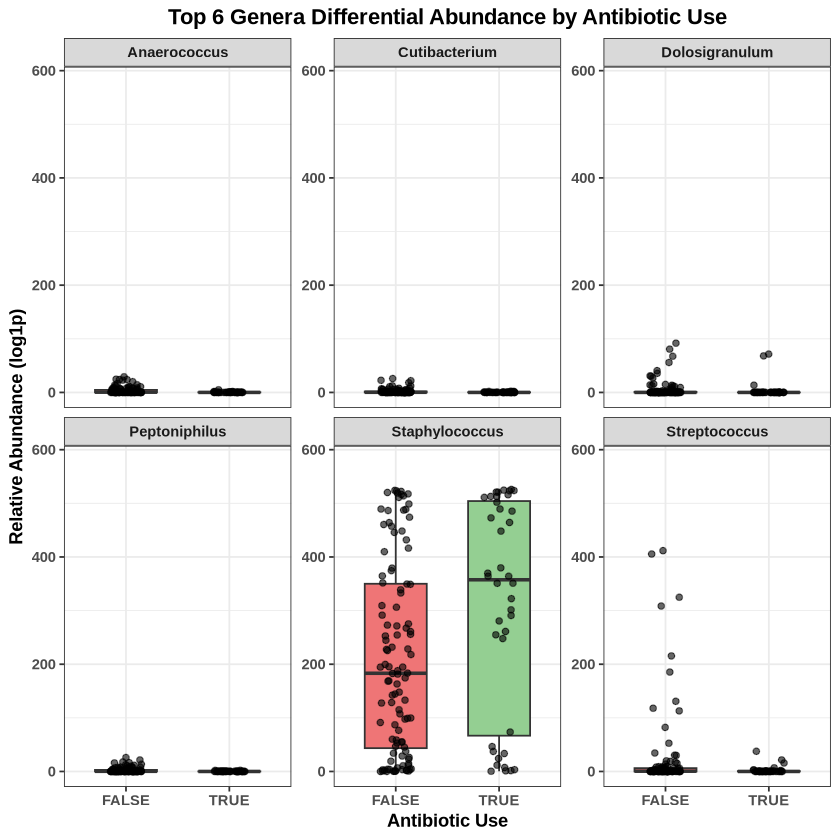

In [127]:
# Compute max abundance to expand y-axis
max_y <- max(abund_top6$RelAbundance, na.rm = TRUE)

# Plot with slightly larger y-axis
top6_plot <- ggplot(abund_top6, aes(x = AntUse, y = RelAbundance, fill = AntUse)) +
  geom_boxplot(outlier.shape = NA, width = 0.6) +
  geom_jitter(width = 0.15, alpha = 0.6, size = 1.5) +
  facet_wrap(~Genus, scales = "free_y") +
  # scale_y_continuous(trans = "log1p") +
  scale_fill_manual(values = c(
    "FALSE" = "#ef7576",
    "TRUE"  = "#94cf92"
  )) +
  coord_cartesian(ylim = c(0, max_y * 1.1)) +  # expand y-axis by 10%
  theme_bw() +
  theme(
    axis.text.x = element_text(angle = 0, hjust = 0.5, face = "bold"),
    axis.text.y = element_text(face = "bold"),
    axis.title = element_text(face = "bold"),
    strip.text = element_text(face = "bold"),
    legend.position = "none",
    plot.title = element_text(face = "bold", hjust = 0.5)
  ) +
  labs(
    x = "Antibiotic Use",
    y = "Relative Abundance (log1p)",
    title = "Top 6 Genera Differential Abundance by Antibiotic Use"
  )

top6_plot

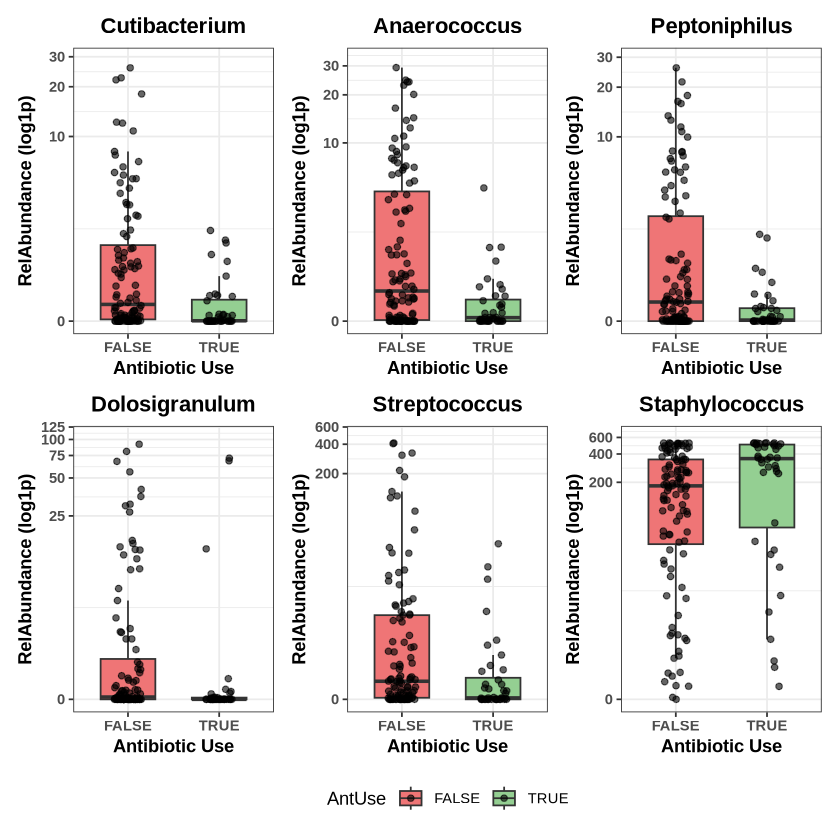

In [131]:
library(patchwork)

# Create individual plots with legend only in the first plot
individual_plots2 <- lapply(seq_along(top6_genera), function(i) {
  g <- top6_genera[i]
  df_genus <- abund_top6 %>% filter(Genus == g)
  max_y <- max(df_genus$RelAbundance, na.rm = TRUE)
  
  ggplot(df_genus, aes(x = AntUse, y = RelAbundance, fill = AntUse)) +
    geom_boxplot(outlier.shape = NA, width = 0.6) +
    geom_jitter(width = 0.15, alpha = 0.6, size = 1.5) +
    scale_y_continuous(trans = "log1p") +
    scale_fill_manual(values = c(
      "FALSE" = "#ef7576",
      "TRUE"  = "#94cf92"
    )) +
    coord_cartesian(ylim = c(0, max_y * 1.1)) +
    theme_bw() +
    theme(
      axis.text.x = element_text(angle = 0, hjust = 0.5, face = "bold"),
      axis.text.y = element_text(face = "bold"),
      axis.title = element_text(face = "bold"),
      strip.text = element_text(face = "bold"),
      legend.position = ifelse(i == 1, "right", "none"), # legend only in first plot
      plot.title = element_text(face = "bold", hjust = 0.5)
    ) +
    labs(
      x = "Antibiotic Use",
      y = "RelAbundance (log1p)",
      title = g
    )
})

# Combine plots in a panel with a shared legend
panel_plot <- wrap_plots(individual_plots2, nrow = 2, guides = "collect") &
  theme(legend.position = "bottom")

panel_plot

In [133]:
ggsave("antUse_relabund.png", plot = panel_plot,
       width = 8, height = 10, dpi = 300)

In [134]:
wilcox_results <- abund_long %>%
  group_by(Genus) %>%
  summarise(
    p_wilcox = if(n_distinct(AntUse) == 2)
      suppressWarnings(wilcox.test(RelAbundance ~ AntUse, exact = FALSE)$p.value)
    else NA_real_,
    .groups = "drop"
  ) %>%
  mutate(
    p_adjusted = p.adjust(p_wilcox, method = "bonferroni"),
    significance = case_when(
      p_adjusted <= 0.001 ~ "***",
      p_adjusted <= 0.01  ~ "**",
      p_adjusted <= 0.05  ~ "*",
      TRUE                ~ "ns"
    )
  ) %>%
  arrange(p_adjusted)

# View top 10 with significance
head(wilcox_results, 10)


Genus,p_wilcox,p_adjusted,significance
<chr>,<dbl>,<dbl>,<chr>
Cutibacterium,0.0002641472,0.008981005,**
Anaerococcus,0.0003356455,0.011411945,*
Peptoniphilus,0.0004890158,0.016626536,*
Dolosigranulum,0.0016553602,0.056282246,ns
Streptococcus,0.0039982377,0.135940082,ns
Staphylococcus,0.0051094886,0.173722614,ns
Finegoldia,0.0103550060,0.352070205,ns
Corynebacterium,0.0125995323,0.428384097,ns
Incertae Sedis,0.0262177724,0.891404260,ns


In [136]:
head(alpha_merged)

,Observed,Chao1,se.chao1,ACE,se.ACE,Shannon,Simpson,InvSimpson,Fisher,ID_Sample,ClinicCtrl,SurgeryGroup
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<fct>
1,5,5.000000,0.2236068,5.70059,1.103161,0.1102647,0.035554,1.036865,0.6863709,0001967K_T1,NC,early_post
2,1,1.000000,0.0000000,NA,NA,0.0000000,0.000000,1.000000,0.1096721,0001967K_T3,NC,early_post
3,1,1.000000,0.0000000,NA,NA,0.0000000,0.000000,1.000000,0.1096721,0001967K_T6,NC,late_post
4,9,9.333333,0.9148009,10.57551,1.525651,0.5201432,0.231824,1.301785,1.3638955,0088303G_T0,NC,pre_surgery
5,1,1.000000,0.0000000,NA,NA,0.0000000,0.000000,1.000000,0.1096721,0088303G_T1,NC,early_post
6,16,16.250000,0.7327750,17.89744,1.898376,1.3340343,0.529392,2.124911,2.7048062,0110059G_T0,NC,pre_surgery


In [139]:
alpha_df_cor <- alpha_df %>%
  left_join(merged_df %>% select(ID_Sample, ClinicCtrl, SurgeryGroup, AntUse), by = "ID_Sample") %>%
  filter(!is.na(SurgeryGroup), !is.na(Shannon))
print(tail(alpha_df_cor))

    Observed Chao1  se.chao1      ACE   se.ACE   Shannon  Simpson InvSimpson
143        8  14.0 7.1013077 22.14286 1.668859 0.8055769 0.439142   1.782983
144        4   4.0 0.0000000  4.00000 1.000000 0.2657058 0.115714   1.130856
145       12  15.0 4.5166359 14.35714 1.844089 0.7861712 0.340386   1.516038
146       13  14.2 1.8334544 15.66667 1.934744 0.5125407 0.218714   1.279941
147       19  26.0 7.0907578 30.69136 3.272314 0.6527525 0.228844   1.296754
148        3   3.0 0.4082483       NA       NA 0.1883166 0.086038   1.094137
       Fisher   ID_Sample ClinicCtrl SurgeryGroup AntUse
143 1.1874535 1645117H_T1         PC   early_post   TRUE
144 0.5303291 1654702B_T0         NC  pre_surgery  FALSE
145 1.9173288 1654702B_T1         PC   early_post   TRUE
146 2.1091801 1654702B_T6         PC    late_post   TRUE
147 3.3283227 1668337K_T0         NC  pre_surgery  FALSE
148 0.3810527 1668337K_T1         NC   early_post   TRUE


In [140]:
alpha_long <- alpha_df_cor %>%
  pivot_longer(
    cols = c(Observed, Chao1, se.chao1, ACE, se.ACE, Shannon, Simpson, InvSimpson, Fisher),
    names_to = "Metric",
    values_to = "Value"
  ) %>%
  filter(!is.na(AntUse))  # keep only samples with AntUse info

# Check the result
head(alpha_long)

ID_Sample,ClinicCtrl,SurgeryGroup,AntUse,Metric,Value
<chr>,<chr>,<chr>,<lgl>,<chr>,<dbl>
0001967K_T1,NC,early_post,TRUE,Observed,5.0000000
0001967K_T1,NC,early_post,TRUE,Chao1,5.0000000
0001967K_T1,NC,early_post,TRUE,se.chao1,0.2236068
0001967K_T1,NC,early_post,TRUE,ACE,5.7005903
0001967K_T1,NC,early_post,TRUE,se.ACE,1.1031608
0001967K_T1,NC,early_post,TRUE,Shannon,0.1102647


In [141]:
# Filter Shannon values
shannon_df <- alpha_long %>%
  filter(Metric == "Shannon")

# Wilcoxon test for Shannon ~ AntUse
wilcox_shannon <- wilcox.test(Value ~ AntUse, data = shannon_df, exact = FALSE)

# Extract p-value and add significance
p_value <- wilcox_shannon$p.value
significance <- case_when(
  p_value <= 0.001 ~ "***",
  p_value <= 0.01  ~ "**",
  p_value <= 0.05  ~ "*",
  TRUE             ~ "ns"
)

# Create a small summary tibble
wilcox_shannon_result <- tibble(
  Metric = "Shannon",
  p_wilcox = p_value,
  significance = significance
)

wilcox_shannon_result

Metric,p_wilcox,significance
<chr>,<dbl>,<chr>
Shannon,0.001767714,**


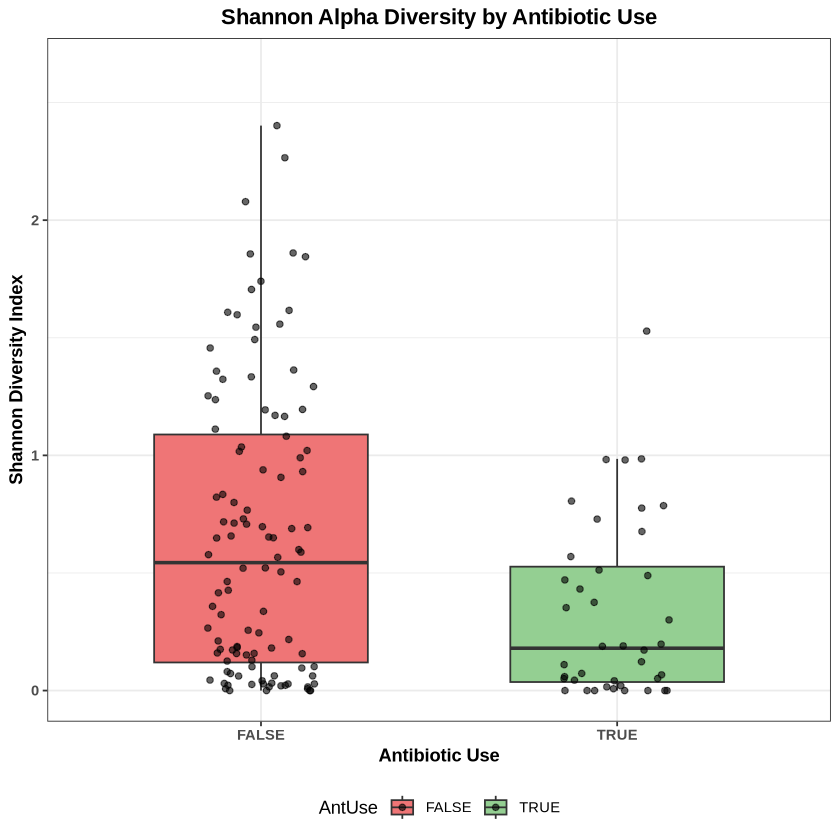

In [144]:
library(ggplot2)

# Filter Shannon metric
shannon_df <- alpha_long %>% filter(Metric == "Shannon")

# Determine y-axis limit with 10% increment
max_y <- max(shannon_df$Value, na.rm = TRUE)

# Plot Shannon diversity by antibiotic use
shannon_plot <- ggplot(shannon_df, aes(x = AntUse, y = Value, fill = AntUse)) +
  geom_boxplot(outlier.shape = NA, width = 0.6) +
  geom_jitter(width = 0.15, alpha = 0.6, size = 1.5) +
  scale_fill_manual(values = c(
    "FALSE" = "#ef7576",
    "TRUE"  = "#94cf92"
  )) +
  coord_cartesian(ylim = c(0, max_y * 1.1)) +  # expand y-axis by 10%
  theme_bw() +
  theme(
    axis.text.x = element_text(face = "bold", hjust = 0.5),
    axis.text.y = element_text(face = "bold"),
    axis.title = element_text(face = "bold"),
    legend.position = "bottom",
    plot.title = element_text(face = "bold", hjust = 0.5)
  ) +
  labs(
    x = "Antibiotic Use",
    y = "Shannon Diversity Index",
    title = "Shannon Alpha Diversity by Antibiotic Use"
  )

shannon_plot

In [145]:
ggsave("antUse_shannon.png", plot = shannon_plot,
       width = 8, height = 10, dpi = 300)

In [160]:
# Map samples to timepoints or surgery groups
time_group_map <- c(
  "T0" = "pre_surgery",
  "T1" = "early_post",
  "T3" = "early_post",
  "T6" = "late_post",
  "T12" = "late_post"
)

get_time_group <- function(id_sample) {
  tp <- str_extract(id_sample, "T[0-9]+")
  time_group_map[tp]
}

# 1) Merge all abundance files
abund_files <- list.files(path = "./", pattern = "Abund_by_Timepoint_4_Corr_.*\\.tsv$", full.names = TRUE)
abund_list <- lapply(abund_files, function(f) {
  df <- read.delim(f, check.names = FALSE, row.names = 1)
  df[is.na(df)] <- 0
  df %>% rownames_to_column(var = "ID_Sample")
})
all_abund <- bind_rows(abund_list)

# 2) Merge with metadata
merged_df <- all_abund %>%
  left_join(metadata_filtered %>% select(ID_Sample, ClinicCtrl, Cortuse), by = "ID_Sample") %>%
  filter(!is.na(ClinicCtrl))

# 3) Add surgery/time groups
merged_df$SurgeryGroup <- sapply(merged_df$ID_Sample, get_time_group)


In [161]:
print(head(merged_df))

    ID_Sample Anaerococcus Corynebacterium Cutibacterium Dolosigranulum
1 0088303G_T0    0.6011422       5.6807935     0.1502855    14.93838293
2 0110059G_T0   11.0485269       0.5199307     5.8925477     6.15251300
3 0130765A_T0   10.6796117       0.8252427     1.1650485     0.04854369
4 0207720E_T0    0.7651841       0.0000000     0.1912960     0.11956002
5 0236549G_T0    0.7183908      25.6465517     0.8620690     2.51436782
6 0313863D_T0    0.3693592       1.1883732     0.1927092    91.77774209
  Finegoldia Haemophilus Incertae Sedis Peptoniphilus Porphyromonas Pseudomonas
1 0.81154193   0.1803427      1.1722272     0.7213706    0.12022843  0.06011422
2 5.63258232   2.7296360      0.4766031    21.4904679    0.04332756  3.46620451
3 5.82524272   1.7961165      1.2621359    10.7766990    0.00000000 14.70873786
4 0.07173601   0.0000000      0.1195600     0.2869440    0.00000000  0.52606408
5 0.14367816   0.0000000      0.1436782     0.4310345    0.00000000  5.45977011
6 0.06423639   0

In [162]:
# Ensure AntUse is logical (TRUE/FALSE)
merged_df <- merged_df %>%
    mutate(
        Cortuse = ifelse(is.na(Cortuse), FALSE, Cortuse),  # Replace NA with FALSE
        Cortuse = as.logical(Cortuse)                     # Ensure logical type
          )

print(head(merged_df)) # always nice to check head and tail

    ID_Sample Anaerococcus Corynebacterium Cutibacterium Dolosigranulum
1 0088303G_T0    0.6011422       5.6807935     0.1502855    14.93838293
2 0110059G_T0   11.0485269       0.5199307     5.8925477     6.15251300
3 0130765A_T0   10.6796117       0.8252427     1.1650485     0.04854369
4 0207720E_T0    0.7651841       0.0000000     0.1912960     0.11956002
5 0236549G_T0    0.7183908      25.6465517     0.8620690     2.51436782
6 0313863D_T0    0.3693592       1.1883732     0.1927092    91.77774209
  Finegoldia Haemophilus Incertae Sedis Peptoniphilus Porphyromonas Pseudomonas
1 0.81154193   0.1803427      1.1722272     0.7213706    0.12022843  0.06011422
2 5.63258232   2.7296360      0.4766031    21.4904679    0.04332756  3.46620451
3 5.82524272   1.7961165      1.2621359    10.7766990    0.00000000 14.70873786
4 0.07173601   0.0000000      0.1195600     0.2869440    0.00000000  0.52606408
5 0.14367816   0.0000000      0.1436782     0.4310345    0.00000000  5.45977011
6 0.06423639   0

In [163]:
abund_long2 <- merged_df %>%
  pivot_longer(
    cols = -c(ID_Sample, ClinicCtrl, Cortuse, SurgeryGroup),
    names_to = "Genus",
    values_to = "RelAbundance"
  ) %>%
  filter(!is.na(Cortuse))  # Keep only samples with Cortuse info
head(abund_long2)

ID_Sample,ClinicCtrl,Cortuse,SurgeryGroup,Genus,RelAbundance
<chr>,<chr>,<lgl>,<chr>,<chr>,<dbl>
0088303G_T0,NC,FALSE,pre_surgery,Anaerococcus,0.6011422
0088303G_T0,NC,FALSE,pre_surgery,Corynebacterium,5.6807935
0088303G_T0,NC,FALSE,pre_surgery,Cutibacterium,0.1502855
0088303G_T0,NC,FALSE,pre_surgery,Dolosigranulum,14.9383829
0088303G_T0,NC,FALSE,pre_surgery,Finegoldia,0.8115419
0088303G_T0,NC,FALSE,pre_surgery,Haemophilus,0.1803427


In [165]:
wilcox_results <- abund_long2 %>%
  group_by(Genus) %>%
  summarise(
    p_wilcox = if(n_distinct(Cortuse) == 2)
      suppressWarnings(wilcox.test(RelAbundance ~ Cortuse, exact = FALSE)$p.value)
    else NA_real_,
    .groups = "drop"
  ) %>%
  mutate(
    p_adjusted = p.adjust(p_wilcox, method = "bonferroni"),
    significance = case_when(
      p_adjusted <= 0.001 ~ "***",
      p_adjusted <= 0.01  ~ "**",
      p_adjusted <= 0.05  ~ "*",
      TRUE                ~ "ns"
    )
  ) %>%
  arrange(p_adjusted)

# View top 10 with significance
head(wilcox_results, 10)


Genus,p_wilcox,p_adjusted,significance
<chr>,<dbl>,<dbl>,<chr>
Streptococcus,0.01402937,0.4769985,ns
Prevotella,0.01783136,0.6062663,ns
Dolosigranulum,0.02436730,0.8284882,ns
Achromobacter,0.35379240,1.0000000,ns
Acinetobacter,0.55022043,1.0000000,ns
Aggregatibacter,0.74795011,1.0000000,ns
Anaerococcus,0.07512965,1.0000000,ns
Bacillus,0.85483488,1.0000000,ns
Burkholderia-Caballeronia-Paraburkholderia,0.47015890,1.0000000,ns


In [167]:
alpha_df_cor2 <- alpha_df %>%
  left_join(merged_df %>% select(ID_Sample, ClinicCtrl, SurgeryGroup, Cortuse), by = "ID_Sample") %>%
  filter(!is.na(SurgeryGroup), !is.na(Shannon))
print(tail(alpha_df_cor2))

    Observed Chao1  se.chao1      ACE   se.ACE   Shannon  Simpson InvSimpson
143        8  14.0 7.1013077 22.14286 1.668859 0.8055769 0.439142   1.782983
144        4   4.0 0.0000000  4.00000 1.000000 0.2657058 0.115714   1.130856
145       12  15.0 4.5166359 14.35714 1.844089 0.7861712 0.340386   1.516038
146       13  14.2 1.8334544 15.66667 1.934744 0.5125407 0.218714   1.279941
147       19  26.0 7.0907578 30.69136 3.272314 0.6527525 0.228844   1.296754
148        3   3.0 0.4082483       NA       NA 0.1883166 0.086038   1.094137
       Fisher   ID_Sample ClinicCtrl SurgeryGroup Cortuse
143 1.1874535 1645117H_T1         PC   early_post    TRUE
144 0.5303291 1654702B_T0         NC  pre_surgery   FALSE
145 1.9173288 1654702B_T1         PC   early_post    TRUE
146 2.1091801 1654702B_T6         PC    late_post   FALSE
147 3.3283227 1668337K_T0         NC  pre_surgery   FALSE
148 0.3810527 1668337K_T1         NC   early_post   FALSE


In [169]:
alpha_long2 <- alpha_df_cor2 %>%
  pivot_longer(
    cols = c(Observed, Chao1, se.chao1, ACE, se.ACE, Shannon, Simpson, InvSimpson, Fisher),
    names_to = "Metric",
    values_to = "Value"
  ) %>%
  filter(!is.na(Cortuse))  # keep only samples with AntUse info

# Check the result
head(alpha_long2)

ID_Sample,ClinicCtrl,SurgeryGroup,Cortuse,Metric,Value
<chr>,<chr>,<chr>,<lgl>,<chr>,<dbl>
0001967K_T1,NC,early_post,TRUE,Observed,5.0000000
0001967K_T1,NC,early_post,TRUE,Chao1,5.0000000
0001967K_T1,NC,early_post,TRUE,se.chao1,0.2236068
0001967K_T1,NC,early_post,TRUE,ACE,5.7005903
0001967K_T1,NC,early_post,TRUE,se.ACE,1.1031608
0001967K_T1,NC,early_post,TRUE,Shannon,0.1102647


In [171]:
# Filter Shannon values
shannon_df2 <- alpha_long2 %>%
  filter(Metric == "Shannon")

# Wilcoxon test for Shannon ~ AntUse
wilcox_shannon <- wilcox.test(Value ~ Cortuse, data = shannon_df2, exact = FALSE)

# Extract p-value and add significance
p_value <- wilcox_shannon$p.value
significance <- case_when(
  p_value <= 0.001 ~ "***",
  p_value <= 0.01  ~ "**",
  p_value <= 0.05  ~ "*",
  TRUE             ~ "ns"
)

# Create a small summary tibble
wilcox_shannon_result2 <- tibble(
  Metric = "Shannon",
  p_wilcox = p_value,
  significance = significance
)

wilcox_shannon_result2

Metric,p_wilcox,significance
<chr>,<dbl>,<chr>
Shannon,0.08095332,ns


In [182]:
# ---------- Correlation: microbes x SNOT22

# print(head(abund_df_all))

# colnames(metadata_filtered)

##  Merge with metadata 
merged_df <- abund_df_all %>%
  left_join(metadata_filtered %>% select(ID_Sample, ClinicCtrl, SNOT22), by = "ID_Sample") %>%
  filter(!is.na(ClinicCtrl))

# Map samples to timepoints or surgery groups
time_group_map <- c(
  "T0" = "pre_surgery",
  "T1" = "early_post",
  "T3" = "early_post",
  "T6" = "late_post",
  "T12" = "late_post"
)

get_time_group <- function(id_sample) {
  tp <- str_extract(id_sample, "T[0-9]+")
  time_group_map[tp]
}

# Add surgery/time groups
merged_df$SurgeryGroup <- sapply(merged_df$ID_Sample, get_time_group)

# 4) Extract genus abundance matrix
genus_data <- merged_df %>% select(-ID_Sample, -ClinicCtrl, -SurgeryGroup, -SNOT22)

# Replace NA with 0
genus_data <- genus_data %>% mutate(across(everything(), ~ ifelse(is.na(.), 0, .)))
print(head(genus_data))
print(head(merged_df))


  Anaerococcus Corynebacterium Cutibacterium Dolosigranulum Finegoldia
1    0.6011422       5.6807935     0.1502855    14.93838293 0.81154193
2   11.0485269       0.5199307     5.8925477     6.15251300 5.63258232
3   10.6796117       0.8252427     1.1650485     0.04854369 5.82524272
4    0.7651841       0.0000000     0.1912960     0.11956002 0.07173601
5    0.7183908      25.6465517     0.8620690     2.51436782 0.14367816
6    0.3693592       1.1883732     0.1927092    91.77774209 0.06423639
  Haemophilus Incertae Sedis Peptoniphilus Porphyromonas Pseudomonas
1   0.1803427      1.1722272     0.7213706    0.12022843  0.06011422
2   2.7296360      0.4766031    21.4904679    0.04332756  3.46620451
3   1.7961165      1.2621359    10.7766990    0.00000000 14.70873786
4   0.0000000      0.1195600     0.2869440    0.00000000  0.52606408
5   0.0000000      0.1436782     0.4310345    0.00000000  5.45977011
6   0.0160591      0.1124137     0.2408865    0.00000000  0.00000000
  Staphylococcus Str

In [186]:
# ---- Function to compute Spearman correlation for each genus ----
compute_spearman <- function(df) {
  genus_cols <- setdiff(colnames(df), c("ID_Sample", "ClinicCtrl", "SurgeryGroup", "SNOT22"))
  
  results <- lapply(genus_cols, function(genus) {
    x <- df[[genus]]
    y <- df$SNOT22
    
    # Skip if not enough unique values
    if (length(unique(x[!is.na(x)])) < 2 | length(unique(y[!is.na(y)])) < 2) {
      return(NULL)
    }
    
    cor_test <- suppressWarnings(cor.test(x, y, method = "spearman"))
    
    data.frame(
      Genus = genus,
      rho = cor_test$estimate,
      p_value = cor_test$p.value
    )
  })
  
  # Combine results and adjust p-values
  results_df <- bind_rows(results) %>%
    mutate(p_adj = p.adjust(p_value, method = "fdr")) %>%
    arrange(p_value)
  
  return(results_df)
}

overall_corr <- compute_spearman(merged_df)

by_group_corr <- merged_df %>%
  group_split(SurgeryGroup) %>%
  setNames(unique(merged_df$SurgeryGroup)) %>%
  lapply(compute_spearman)

head(overall_corr)
lapply(by_group_corr, head)

,Genus,rho,p_value,p_adj
,<chr>,<dbl>,<dbl>,<dbl>
rho...1,Mycoplasmoides,-0.2573932,0.01092138,0.3713271
rho...2,Serratia,-0.1727393,0.03577684,0.6082063
rho...3,Noviherbaspirillum,0.1763487,0.07771918,0.7991680
rho...4,Aggregatibacter,0.1339491,0.14991783,0.7991680
rho...5,Anaerococcus,-0.1122537,0.17435460,0.7991680
rho...6,Leptotrichia,-0.1263669,0.17838924,0.7991680


,Genus,rho,p_value,p_adj
,<chr>,<dbl>,<dbl>,<dbl>
rho...1,Acinetobacter,-0.2553542,0.04170340,0.3248483
rho...2,Incertae Sedis,-0.2519330,0.04461558,0.3248483
rho...3,Streptococcus,-0.2416812,0.05435841,0.3248483
rho...4,Staphylococcus,0.2365383,0.05986171,0.3248483
rho...5,Finegoldia,-0.2240379,0.07512894,0.3248483
rho...6,Noviherbaspirillum,0.2234065,0.07597556,0.3248483
,Genus,rho,p_value,p_adj
,<chr>,<dbl>,<dbl>,<dbl>
rho...1,Anaerococcus,-0.3977979,0.005622521,0.1249804


In [187]:
colnames(metadata_filtered)

[1] "ID_Sample"           "SNOT22"              "SNOT22nasal"        
 [4] "LK_Total"            "LK_Secret"           "ClinicCtrl"         
 [7] "AntUse"              "Cortuse"             "Patient"            
[10] "Filename"            "nreads"              "Timepoint"          
[13] "Sex"                 "Age"                 "Atopic_Symptoms"    
[16] "Asthma"              "NSAID_Intolerance"   "Total_IgE"          
[19] "Blood_Eosinophilia"  "Tissue_Eosinophilia" "Final_LundMackay"

In [188]:
# ---------- Correlation: microbes x SNOT22nasal

# print(head(abund_df_all))

# colnames(metadata_filtered)

##  Merge with metadata 
merged_df <- abund_df_all %>%
  left_join(metadata_filtered %>% select(ID_Sample, ClinicCtrl, SNOT22nasal), by = "ID_Sample") %>%
  filter(!is.na(ClinicCtrl))

# Map samples to timepoints or surgery groups
time_group_map <- c(
  "T0" = "pre_surgery",
  "T1" = "early_post",
  "T3" = "early_post",
  "T6" = "late_post",
  "T12" = "late_post"
)

get_time_group <- function(id_sample) {
  tp <- str_extract(id_sample, "T[0-9]+")
  time_group_map[tp]
}

# Add surgery/time groups
merged_df$SurgeryGroup <- sapply(merged_df$ID_Sample, get_time_group)

# 4) Extract genus abundance matrix
genus_data <- merged_df %>% select(-ID_Sample, -ClinicCtrl, -SurgeryGroup, -SNOT22nasal)

# Replace NA with 0
genus_data <- genus_data %>% mutate(across(everything(), ~ ifelse(is.na(.), 0, .)))
print(head(genus_data))
print(head(merged_df))

# ---- Function to compute Spearman correlation for each genus ----
compute_spearman <- function(df) {
  genus_cols <- setdiff(colnames(df), c("ID_Sample", "ClinicCtrl", "SurgeryGroup", "SNOT22nasal"))
  
  results <- lapply(genus_cols, function(genus) {
    x <- df[[genus]]
    y <- df$SNOT22nasal
    
    # Skip if not enough unique values
    if (length(unique(x[!is.na(x)])) < 2 | length(unique(y[!is.na(y)])) < 2) {
      return(NULL)
    }
    
    cor_test <- suppressWarnings(cor.test(x, y, method = "spearman"))
    
    data.frame(
      Genus = genus,
      rho = cor_test$estimate,
      p_value = cor_test$p.value
    )
  })
  
  # Combine results and adjust p-values
  results_df <- bind_rows(results) %>%
    mutate(p_adj = p.adjust(p_value, method = "bonferroni")) %>%
    arrange(p_value)
  
  return(results_df)
}

overall_corr <- compute_spearman(merged_df)

by_group_corr <- merged_df %>%
  group_split(SurgeryGroup) %>%
  setNames(unique(merged_df$SurgeryGroup)) %>%
  lapply(compute_spearman)

head(overall_corr)
lapply(by_group_corr, head)

  Anaerococcus Corynebacterium Cutibacterium Dolosigranulum Finegoldia
1    0.6011422       5.6807935     0.1502855    14.93838293 0.81154193
2   11.0485269       0.5199307     5.8925477     6.15251300 5.63258232
3   10.6796117       0.8252427     1.1650485     0.04854369 5.82524272
4    0.7651841       0.0000000     0.1912960     0.11956002 0.07173601
5    0.7183908      25.6465517     0.8620690     2.51436782 0.14367816
6    0.3693592       1.1883732     0.1927092    91.77774209 0.06423639
  Haemophilus Incertae Sedis Peptoniphilus Porphyromonas Pseudomonas
1   0.1803427      1.1722272     0.7213706    0.12022843  0.06011422
2   2.7296360      0.4766031    21.4904679    0.04332756  3.46620451
3   1.7961165      1.2621359    10.7766990    0.00000000 14.70873786
4   0.0000000      0.1195600     0.2869440    0.00000000  0.52606408
5   0.0000000      0.1436782     0.4310345    0.00000000  5.45977011
6   0.0160591      0.1124137     0.2408865    0.00000000  0.00000000
  Staphylococcus Str

,Genus,rho,p_value,p_adj
,<chr>,<dbl>,<dbl>,<dbl>
rho...1,Porphyromonas,0.1591935,0.07267517,1
rho...2,Mycoplasmoides,-0.1829323,0.07289545,1
rho...3,Serratia,-0.1453746,0.07791050,1
rho...4,Staphylococcus,-0.1382952,0.09369269,1
rho...5,Pseudomonas,0.1160044,0.16030891,1
rho...6,Aggregatibacter,0.1288670,0.16613672,1


,Genus,rho,p_value,p_adj
,<chr>,<dbl>,<dbl>,<dbl>
rho...1,Enterobacter,-0.2133705,0.09047886,1
rho...2,Finegoldia,-0.2116238,0.09321154,1
rho...3,Citrobacter,-0.2102835,0.09535191,1
rho...4,Burkholderia-Caballeronia-Paraburkholderia,-0.2969696,0.10472891,1
rho...5,Achromobacter,-0.2969696,0.10472891,1
rho...6,Noviherbaspirillum,0.1967039,0.11926176,1
,Genus,rho,p_value,p_adj
,<chr>,<dbl>,<dbl>,<dbl>
rho...1,Dialister,-0.4320983,0.002421464,0.0799083


In [189]:
# ---------- Correlation: microbes x LK_Total

# print(head(abund_df_all))

# colnames(metadata_filtered)

##  Merge with metadata 
merged_df <- abund_df_all %>%
  left_join(metadata_filtered %>% select(ID_Sample, ClinicCtrl, LK_Total), by = "ID_Sample") %>%
  filter(!is.na(ClinicCtrl))

# Map samples to timepoints or surgery groups
time_group_map <- c(
  "T0" = "pre_surgery",
  "T1" = "early_post",
  "T3" = "early_post",
  "T6" = "late_post",
  "T12" = "late_post"
)

get_time_group <- function(id_sample) {
  tp <- str_extract(id_sample, "T[0-9]+")
  time_group_map[tp]
}

# Add surgery/time groups
merged_df$SurgeryGroup <- sapply(merged_df$ID_Sample, get_time_group)

# 4) Extract genus abundance matrix
genus_data <- merged_df %>% select(-ID_Sample, -ClinicCtrl, -SurgeryGroup, -LK_Total)

# Replace NA with 0
genus_data <- genus_data %>% mutate(across(everything(), ~ ifelse(is.na(.), 0, .)))
print(head(genus_data))
print(head(merged_df))

# ---- Function to compute Spearman correlation for each genus ----
compute_spearman <- function(df) {
  genus_cols <- setdiff(colnames(df), c("ID_Sample", "ClinicCtrl", "SurgeryGroup", "LK_Total"))
  
  results <- lapply(genus_cols, function(genus) {
    x <- df[[genus]]
    y <- df$LK_Total
    
    # Skip if not enough unique values
    if (length(unique(x[!is.na(x)])) < 2 | length(unique(y[!is.na(y)])) < 2) {
      return(NULL)
    }
    
    cor_test <- suppressWarnings(cor.test(x, y, method = "spearman"))
    
    data.frame(
      Genus = genus,
      rho = cor_test$estimate,
      p_value = cor_test$p.value
    )
  })
  
  # Combine results and adjust p-values
  results_df <- bind_rows(results) %>%
    mutate(p_adj = p.adjust(p_value, method = "bonferroni")) %>%
    arrange(p_value)
  
  return(results_df)
}

overall_corr <- compute_spearman(merged_df)

by_group_corr <- merged_df %>%
  group_split(SurgeryGroup) %>%
  setNames(unique(merged_df$SurgeryGroup)) %>%
  lapply(compute_spearman)

head(overall_corr)
lapply(by_group_corr, head)

  Anaerococcus Corynebacterium Cutibacterium Dolosigranulum Finegoldia
1    0.6011422       5.6807935     0.1502855    14.93838293 0.81154193
2   11.0485269       0.5199307     5.8925477     6.15251300 5.63258232
3   10.6796117       0.8252427     1.1650485     0.04854369 5.82524272
4    0.7651841       0.0000000     0.1912960     0.11956002 0.07173601
5    0.7183908      25.6465517     0.8620690     2.51436782 0.14367816
6    0.3693592       1.1883732     0.1927092    91.77774209 0.06423639
  Haemophilus Incertae Sedis Peptoniphilus Porphyromonas Pseudomonas
1   0.1803427      1.1722272     0.7213706    0.12022843  0.06011422
2   2.7296360      0.4766031    21.4904679    0.04332756  3.46620451
3   1.7961165      1.2621359    10.7766990    0.00000000 14.70873786
4   0.0000000      0.1195600     0.2869440    0.00000000  0.52606408
5   0.0000000      0.1436782     0.4310345    0.00000000  5.45977011
6   0.0160591      0.1124137     0.2408865    0.00000000  0.00000000
  Staphylococcus Str

,Genus,rho,p_value,p_adj
,<chr>,<dbl>,<dbl>,<dbl>
rho...1,Proteus,-0.1459615,0.07670473,1
rho...2,Peptoniphilus,-0.1436868,0.08146350,1
rho...3,Anaerococcus,-0.1415035,0.08625146,1
rho...4,Aggregatibacter,0.1503326,0.10569596,1
rho...5,Staphylococcus,-0.1126374,0.17287752,1
rho...6,Parvimonas,-0.1120460,0.17515834,1


,Genus,rho,p_value,p_adj
,<chr>,<dbl>,<dbl>,<dbl>
rho...1,Peptoniphilus,-0.4627427,0.0001181336,0.004016543
rho...2,Anaerococcus,-0.3888211,0.0014973006,0.050908221
rho...3,Dolosigranulum,-0.3677170,0.0027966508,0.095086128
rho...4,Finegoldia,-0.2916514,0.0193711379,0.658618689
rho...5,Parvimonas,-0.2909085,0.0196963421,0.669675631
rho...6,Corynebacterium,-0.2431551,0.0528594350,1.000000000
,Genus,rho,p_value,p_adj
,<chr>,<dbl>,<dbl>,<dbl>
rho...1,Corynebacterium,-0.5331943,0.0001139447,0.003760175


`geom_smooth()` using formula = 'y ~ x'


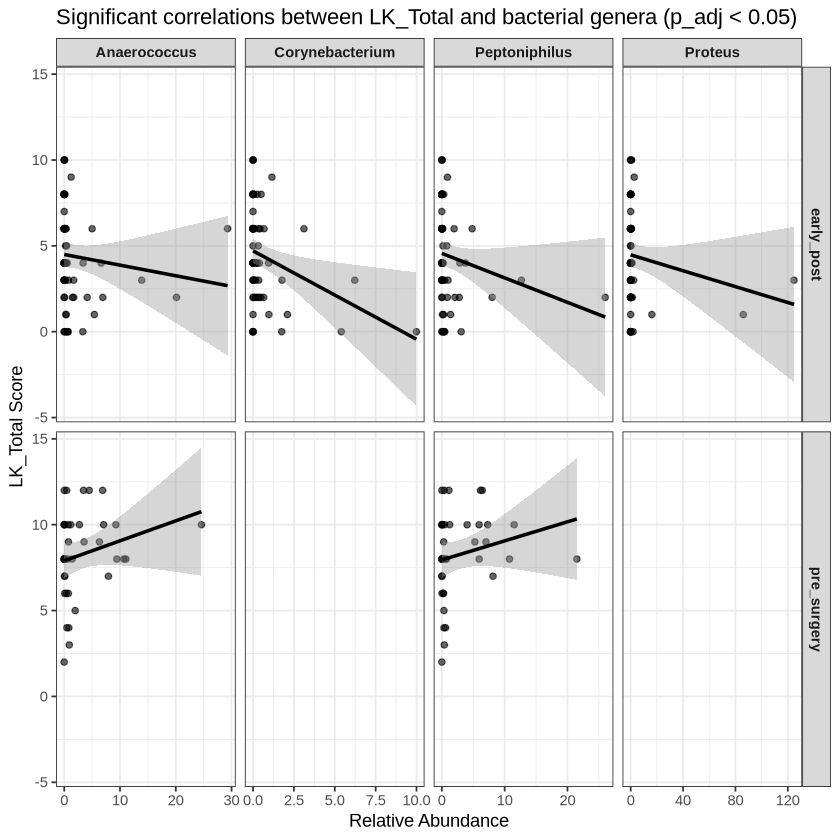

In [195]:
# 1) Combine list into one tibble with SurgeryGroup as column
by_group_corr_df <- bind_rows(by_group_corr, .id = "SurgeryGroup")

# 2) Get significant genus-group pairs
sig_genera_group <- by_group_corr_df %>%
  filter(p_adj < 0.06)

# 3) Build dataframe for plotting
plot_df_group <- merged_df %>%
  select(ID_Sample, LK_Total, SurgeryGroup, all_of(unique(sig_genera_group$Genus))) %>%
  pivot_longer(
    cols = -c(ID_Sample, LK_Total, SurgeryGroup),
    names_to = "Genus",
    values_to = "RelAbundance"
  ) %>%
  inner_join(sig_genera_group %>% select(Genus, SurgeryGroup, rho, p_adj),
             by = c("Genus", "SurgeryGroup"))

# 4) Scatter + lm fit, faceted by Genus
ggplot(plot_df_group, aes(x = RelAbundance, y = LK_Total)) +
  geom_point(alpha = 0.6, color = "black") +
  geom_smooth(method = "lm", se = TRUE, color = "black") +
  facet_grid(SurgeryGroup ~ Genus, scales = "free_x") +
  labs(x = "Relative Abundance", y = "LK_Total Score",
       title = "Significant correlations between LK_Total and bacterial genera (p_adj < 0.05)") +
  theme_bw() +
  theme(strip.text = element_text(face = "bold"),
        legend.position = "none")

In [199]:
# ---------- Correlation: microbes x LK_Secret

# print(head(abund_df_all))

# colnames(metadata_filtered)

##  Merge with metadata 
merged_df <- abund_df_all %>%
  left_join(metadata_filtered %>% select(ID_Sample, ClinicCtrl, LK_Secret), by = "ID_Sample") %>%
  filter(!is.na(ClinicCtrl))

# Map samples to timepoints or surgery groups
time_group_map <- c(
  "T0" = "pre_surgery",
  "T1" = "early_post",
  "T3" = "early_post",
  "T6" = "late_post",
  "T12" = "late_post"
)

get_time_group <- function(id_sample) {
  tp <- str_extract(id_sample, "T[0-9]+")
  time_group_map[tp]
}

# Add surgery/time groups
merged_df$SurgeryGroup <- sapply(merged_df$ID_Sample, get_time_group)

# 4) Extract genus abundance matrix
genus_data <- merged_df %>% select(-ID_Sample, -ClinicCtrl, -SurgeryGroup, -LK_Secret)

# Replace NA with 0
genus_data <- genus_data %>% mutate(across(everything(), ~ ifelse(is.na(.), 0, .)))
print(head(genus_data))
print(head(merged_df))

# ---- Function to compute Spearman correlation for each genus ----
compute_spearman <- function(df) {
  genus_cols <- setdiff(colnames(df), c("ID_Sample", "ClinicCtrl", "SurgeryGroup", "LK_Secret"))
  
  results <- lapply(genus_cols, function(genus) {
    x <- df[[genus]]
    y <- df$LK_Secret
    
    # Skip if not enough unique values
    if (length(unique(x[!is.na(x)])) < 2 | length(unique(y[!is.na(y)])) < 2) {
      return(NULL)
    }
    
    cor_test <- suppressWarnings(cor.test(x, y, method = "spearman"))
    
    data.frame(
      Genus = genus,
      rho = cor_test$estimate,
      p_value = cor_test$p.value
    )
  })
  
  # Combine results and adjust p-values
  results_df <- bind_rows(results) %>%
    mutate(p_adj = p.adjust(p_value, method = "bonferroni")) %>%
    arrange(p_value)
  
  return(results_df)
}

overall_corr <- compute_spearman(merged_df)

by_group_corr <- merged_df %>%
  group_split(SurgeryGroup) %>%
  setNames(unique(merged_df$SurgeryGroup)) %>%
  lapply(compute_spearman)

head(overall_corr)
lapply(by_group_corr, head)

  Anaerococcus Corynebacterium Cutibacterium Dolosigranulum Finegoldia
1    0.6011422       5.6807935     0.1502855    14.93838293 0.81154193
2   11.0485269       0.5199307     5.8925477     6.15251300 5.63258232
3   10.6796117       0.8252427     1.1650485     0.04854369 5.82524272
4    0.7651841       0.0000000     0.1912960     0.11956002 0.07173601
5    0.7183908      25.6465517     0.8620690     2.51436782 0.14367816
6    0.3693592       1.1883732     0.1927092    91.77774209 0.06423639
  Haemophilus Incertae Sedis Peptoniphilus Porphyromonas Pseudomonas
1   0.1803427      1.1722272     0.7213706    0.12022843  0.06011422
2   2.7296360      0.4766031    21.4904679    0.04332756  3.46620451
3   1.7961165      1.2621359    10.7766990    0.00000000 14.70873786
4   0.0000000      0.1195600     0.2869440    0.00000000  0.52606408
5   0.0000000      0.1436782     0.4310345    0.00000000  5.45977011
6   0.0160591      0.1124137     0.2408865    0.00000000  0.00000000
  Staphylococcus Str

,Genus,rho,p_value,p_adj
,<chr>,<dbl>,<dbl>,<dbl>
rho...1,Corynebacterium,-0.2675588,0.001010654,0.03436223
rho...2,Peptoniphilus,-0.2592045,0.001466801,0.04987124
rho...3,Cutibacterium,-0.2586509,0.001502828,0.05109616
rho...4,Anaerococcus,-0.2541820,0.001824519,0.06203364
rho...5,Dolosigranulum,-0.2227173,0.006513199,0.22144877
rho...6,Proteus,-0.1820949,0.026756602,0.90972448


,Genus,rho,p_value,p_adj
,<chr>,<dbl>,<dbl>,<dbl>
rho...1,Peptoniphilus,-0.4096051,0.0007765318,0.02640208
rho...2,Dolosigranulum,-0.3925177,0.0013363593,0.04543622
rho...3,Anaerococcus,-0.3246937,0.0088526473,0.30099001
rho...4,Corynebacterium,-0.2974842,0.0169731305,0.57708644
rho...5,Cutibacterium,-0.2555437,0.0415468286,1.00000000
rho...6,Finegoldia,-0.2392208,0.0569374652,1.00000000
,Genus,rho,p_value,p_adj
,<chr>,<dbl>,<dbl>,<dbl>
rho...1,Cutibacterium,-0.4971350,0.0003782221,0.01248133


`geom_smooth()` using formula = 'y ~ x'


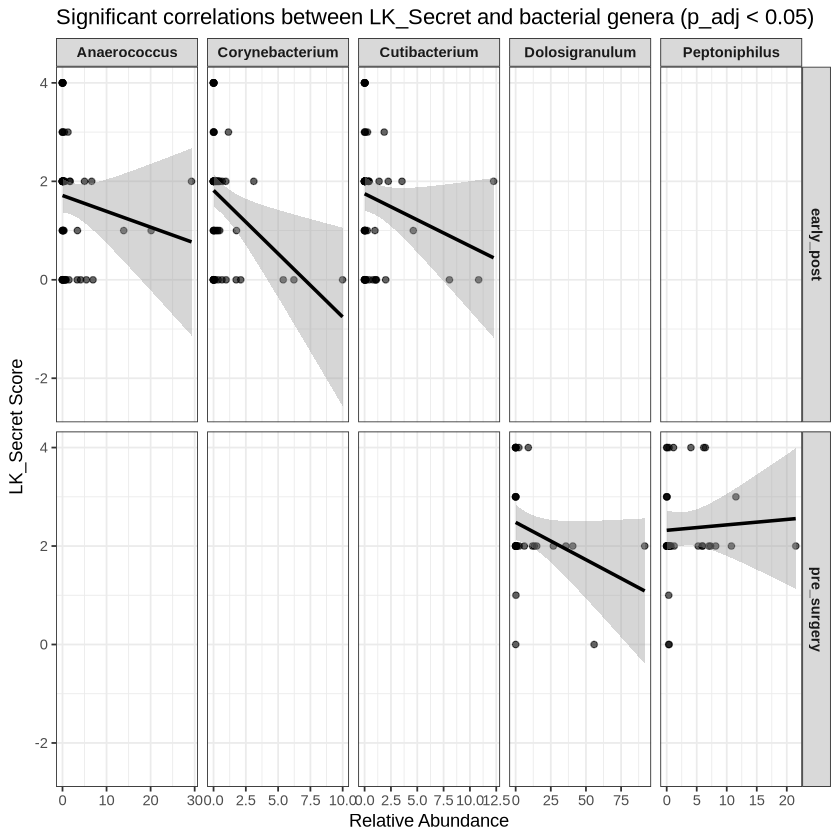

In [200]:
# 1) Combine list into one tibble with SurgeryGroup as column
by_group_corr_df <- bind_rows(by_group_corr, .id = "SurgeryGroup")

# 2) Get significant genus-group pairs
sig_genera_group <- by_group_corr_df %>%
  filter(p_adj < 0.06)

# 3) Build dataframe for plotting
plot_df_group <- merged_df %>%
  select(ID_Sample, LK_Secret, SurgeryGroup, all_of(unique(sig_genera_group$Genus))) %>%
  pivot_longer(
    cols = -c(ID_Sample, LK_Secret, SurgeryGroup),
    names_to = "Genus",
    values_to = "RelAbundance"
  ) %>%
  inner_join(sig_genera_group %>% select(Genus, SurgeryGroup, rho, p_adj),
             by = c("Genus", "SurgeryGroup"))

# 4) Scatter + lm fit, faceted by Genus
ggplot(plot_df_group, aes(x = RelAbundance, y = LK_Secret)) +
  geom_point(alpha = 0.6, color = "black") +
  geom_smooth(method = "lm", se = TRUE, color = "black") +
  facet_grid(SurgeryGroup ~ Genus, scales = "free_x") +
  labs(x = "Relative Abundance", y = "LK_Secret Score",
       title = "Significant correlations between LK_Secret and bacterial genera (p_adj < 0.05)") +
  theme_bw() +
  theme(strip.text = element_text(face = "bold"),
        legend.position = "none")

`geom_smooth()` using formula = 'y ~ x'


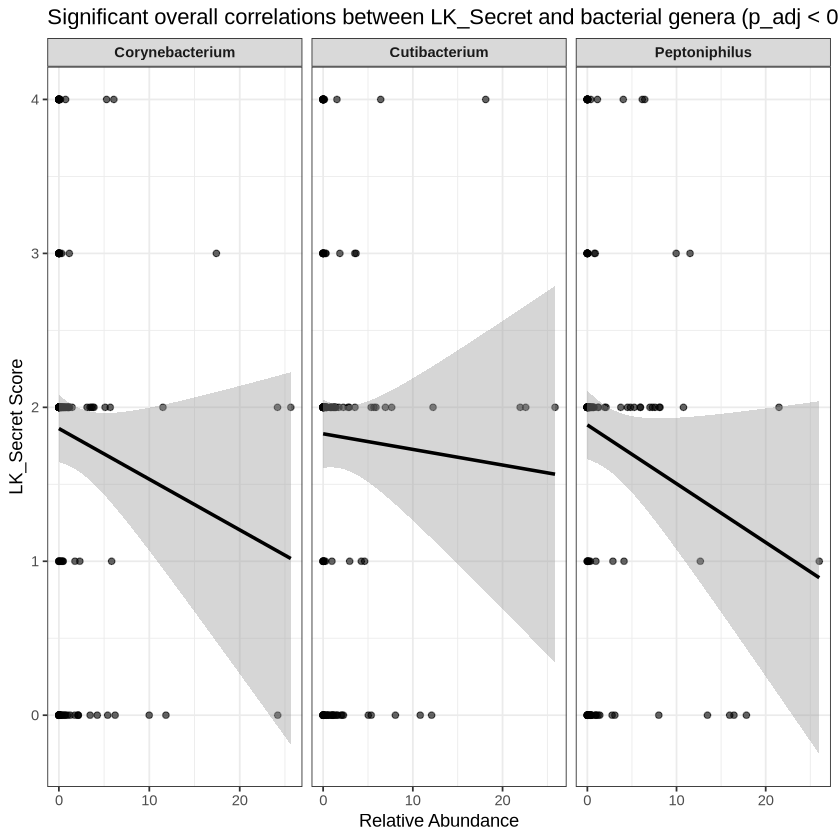

In [202]:
# 1) Get significant overall genera
sig_overall_genera <- overall_corr %>%
  filter(p_adj < 0.06)

# 2) Build dataframe for plotting
plot_df_overall <- merged_df %>%
  select(ID_Sample, LK_Secret, all_of(unique(sig_overall_genera$Genus))) %>%
  pivot_longer(
    cols = -c(ID_Sample, LK_Secret),
    names_to = "Genus",
    values_to = "RelAbundance"
  ) %>%
  inner_join(sig_overall_genera %>% select(Genus, rho, p_adj), by = "Genus")

# 3) Scatter + lm fit, faceted by Genus
ggplot(plot_df_overall, aes(x = RelAbundance, y = LK_Secret)) +
  geom_point(alpha = 0.6, color = "black") +
  geom_smooth(method = "lm", se = TRUE, color = "black") +
  facet_wrap(~ Genus, scales = "free_x") +
  labs(x = "Relative Abundance", y = "LK_Secret Score",
       title = "Significant overall correlations between LK_Secret and bacterial genera (p_adj < 0.05)") +
  theme_bw() +
  theme(strip.text = element_text(face = "bold"),
        legend.position = "none")


In [206]:
# ---------- Correlation: microbes x Final_LundMackay

# print(head(abund_df_all))

# colnames(metadata_filtered)

##  Merge with metadata 
merged_df <- abund_df_all %>%
  left_join(metadata_filtered %>% select(ID_Sample, ClinicCtrl, Final_LundMackay), by = "ID_Sample") %>%
  filter(!is.na(ClinicCtrl))

# Map samples to timepoints or surgery groups
time_group_map <- c(
  "T0" = "pre_surgery",
  "T1" = "early_post",
  "T3" = "early_post",
  "T6" = "late_post",
  "T12" = "late_post"
)

get_time_group <- function(id_sample) {
  tp <- str_extract(id_sample, "T[0-9]+")
  time_group_map[tp]
}

# Add surgery/time groups
merged_df$SurgeryGroup <- sapply(merged_df$ID_Sample, get_time_group)

# 4) Extract genus abundance matrix
genus_data <- merged_df %>% select(-ID_Sample, -ClinicCtrl, -SurgeryGroup, -Final_LundMackay)

# Replace NA with 0
genus_data <- genus_data %>% mutate(across(everything(), ~ ifelse(is.na(.), 0, .)))
print(head(genus_data))
print(head(merged_df))

# ---- Function to compute Spearman correlation for each genus ----
compute_spearman <- function(df) {
  genus_cols <- setdiff(colnames(df), c("ID_Sample", "ClinicCtrl", "SurgeryGroup", "Final_LundMackay"))
  
  results <- lapply(genus_cols, function(genus) {
    x <- df[[genus]]
    y <- df$Final_LundMackay
    
    # Skip if not enough unique values
    if (length(unique(x[!is.na(x)])) < 2 | length(unique(y[!is.na(y)])) < 2) {
      return(NULL)
    }
    
    cor_test <- suppressWarnings(cor.test(x, y, method = "spearman"))
    
    data.frame(
      Genus = genus,
      rho = cor_test$estimate,
      p_value = cor_test$p.value
    )
  })
  
  # Combine results and adjust p-values
  results_df <- bind_rows(results) %>%
    mutate(p_adj = p.adjust(p_value, method = "bonferroni")) %>%
    arrange(p_value)
  
  return(results_df)
}

overall_corr <- compute_spearman(merged_df)

by_group_corr <- merged_df %>%
  group_split(SurgeryGroup) %>%
  setNames(unique(merged_df$SurgeryGroup)) %>%
  lapply(compute_spearman)

head(overall_corr)
lapply(by_group_corr, head)

  Anaerococcus Corynebacterium Cutibacterium Dolosigranulum Finegoldia
1    0.6011422       5.6807935     0.1502855    14.93838293 0.81154193
2   11.0485269       0.5199307     5.8925477     6.15251300 5.63258232
3   10.6796117       0.8252427     1.1650485     0.04854369 5.82524272
4    0.7651841       0.0000000     0.1912960     0.11956002 0.07173601
5    0.7183908      25.6465517     0.8620690     2.51436782 0.14367816
6    0.3693592       1.1883732     0.1927092    91.77774209 0.06423639
  Haemophilus Incertae Sedis Peptoniphilus Porphyromonas Pseudomonas
1   0.1803427      1.1722272     0.7213706    0.12022843  0.06011422
2   2.7296360      0.4766031    21.4904679    0.04332756  3.46620451
3   1.7961165      1.2621359    10.7766990    0.00000000 14.70873786
4   0.0000000      0.1195600     0.2869440    0.00000000  0.52606408
5   0.0000000      0.1436782     0.4310345    0.00000000  5.45977011
6   0.0160591      0.1124137     0.2408865    0.00000000  0.00000000
  Staphylococcus Str

,Genus,rho,p_value,p_adj
,<chr>,<dbl>,<dbl>,<dbl>
rho...1,Cutibacterium,-0.1844242,0.02484034,0.8445715
rho...2,Staphylococcus,-0.1840313,0.02515505,0.8552717
rho...3,Incertae Sedis,0.1717694,0.03684400,1.0000000
rho...4,Porphyromonas,0.1456499,0.10091449,1.0000000
rho...5,Finegoldia,-0.1141959,0.16697186,1.0000000
rho...6,Peptoniphilus,-0.1060109,0.19971646,1.0000000


,Genus,rho,p_value,p_adj
,<chr>,<dbl>,<dbl>,<dbl>
rho...1,Dolosigranulum,-0.2266993,0.07164269,1
rho...2,Finegoldia,-0.2263602,0.07207954,1
rho...3,Peptoniphilus,-0.2237454,0.07552030,1
rho...4,Cutibacterium,-0.1952152,0.12213948,1
rho...5,Streptococcus,-0.1845689,0.14428289,1
rho...6,Porphyromonas,0.1800523,0.15453518,1
,Genus,rho,p_value,p_adj
,<chr>,<dbl>,<dbl>,<dbl>
rho...1,Mycoplasmoides,0.3210870,0.1024600,1
